In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
import torch    
from fast_jtnn import *

pd.set_option('display.max_rows', 100)

RDKit WARNING: [18:31:51] Enabling RDKit 2019.09.1 jupyter extensions
[18:31:51] Enabling RDKit 2019.09.1 jupyter extensions
/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Data

In [2]:
dataset = pd.read_csv('./data/excluded1_qm9_smiles_prop.csv')

In [3]:
dataset['INCHI'] = dataset['smiles'].apply(lambda x: Chem.MolToInchiKey(Chem.MolFromSmiles(x)))
dataset = dataset.drop_duplicates(subset=['INCHI'], keep='first')
dataset.head()

smiles    homo    lumo         r2  \
0                  O=C1Cc2[nH]ccc2N1 -0.1857  0.0144  1083.5746   
1                  C#CC(=NO)C(C)(C)C -0.2373 -0.0309  1224.4887   
2  C[C@H]1C[C@H]2O[C]([NH])C[C@@H]12 -0.2514  0.0310  1090.0422   
3        C[C@]12CC[C@H]1O[C]([NH])O2 -0.2493  0.0595  1038.5643   
4          C[C@H]1C[C@H]2CCO[C@H]2C1 -0.2394  0.0751  1250.3957   

                         INCHI  
0  OPYRETPBRCRXQU-UHFFFAOYSA-N  
1  TULQGOZYBSXENW-UHFFFAOYSA-N  
2  NJWMOGUILIDSKF-HCWXCVPCSA-N  
3  XYOGIJQNGXDPOL-XINAWCOVSA-N  
4  XFPYXPKQTONLOQ-RNJXMRFFSA-N

In [ ]:
img_dataset = Draw.MolsToGridImage([Chem.MolFromSmiles(mol) for mol in list(dataset['smiles'])[:25]], molsPerRow=5,subImgSize=(500,500), legends=list(dataset['smiles'])[:50])
img_dataset

## Prepare Dataset

In [ ]:
#do generate_dataset.py to normalize, tensorize, train-test split etc, vocab generated inside
#do preporcess.py inside joint_training to generate pckl folders

# Training VAE

In [6]:
#after generate_dataset and preprocess.py
#python joint_training_vx_1p.py (arrange the parameters, can use pre saved config jsons)

# Sampling

In [5]:
from fast_molvae.sample_with_latent_v3_3p import main_sample
main_sample('./data/excluded1_vocab.txt', './joint_training/excluded1/v3_excluded_1.txt', './joint_training/outputs/v3_excluded_data', './joint_training/excluded1/model.best', 1000, zprop_size=14)

reading vocab
loading model
new_version
start sampling


/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/torch/nn/functional.py:1956: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
RDKit ERROR: [15:40:44] Explicit valence for atom # 4 O, 4, is greater than permitted
[15:40:44] Explicit valence for atom # 4 O, 4, is greater than permitted
RDKit ERROR: [15:40:44] Explicit valence for atom # 4 O, 4, is greater than permitted
[15:40:44] Explicit valence for atom # 4 O, 4, is greater than permitted
RDKit ERROR: [15:40:44] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [15:40:44] Explicit valence for atom # 1 C, 5, is greater than permitted
[15:40:44] Exp

In [6]:
samples_v3 = pd.read_csv('./joint_training/excluded1/v3_excluded_1.txt', names=['SMILES'])

In [15]:
samples_v3['INCHI'] = samples_v3['SMILES'].apply(lambda x: Chem.MolToInchiKey(Chem.MolFromSmiles(x)))

In [7]:
samples_v3.head()

SMILES                        INCHI
0       O=C1OC2CC12O  NNUYJPMFRFKQON-UHFFFAOYSA-N
1     OCC12CC3NC31N2  AUJKEJOBFZWHKD-UHFFFAOYSA-N
2  OC1CC12C1CC2(O)O1  YKYNPNVSCVRUKC-UHFFFAOYSA-N
3  COC1(C2(C)CO2)CN1  HTUCFVJGNZBBQX-UHFFFAOYSA-N
4  OC1C(O)C12C1CN2C1  FDFDOWLKTPWGDF-UHFFFAOYSA-N

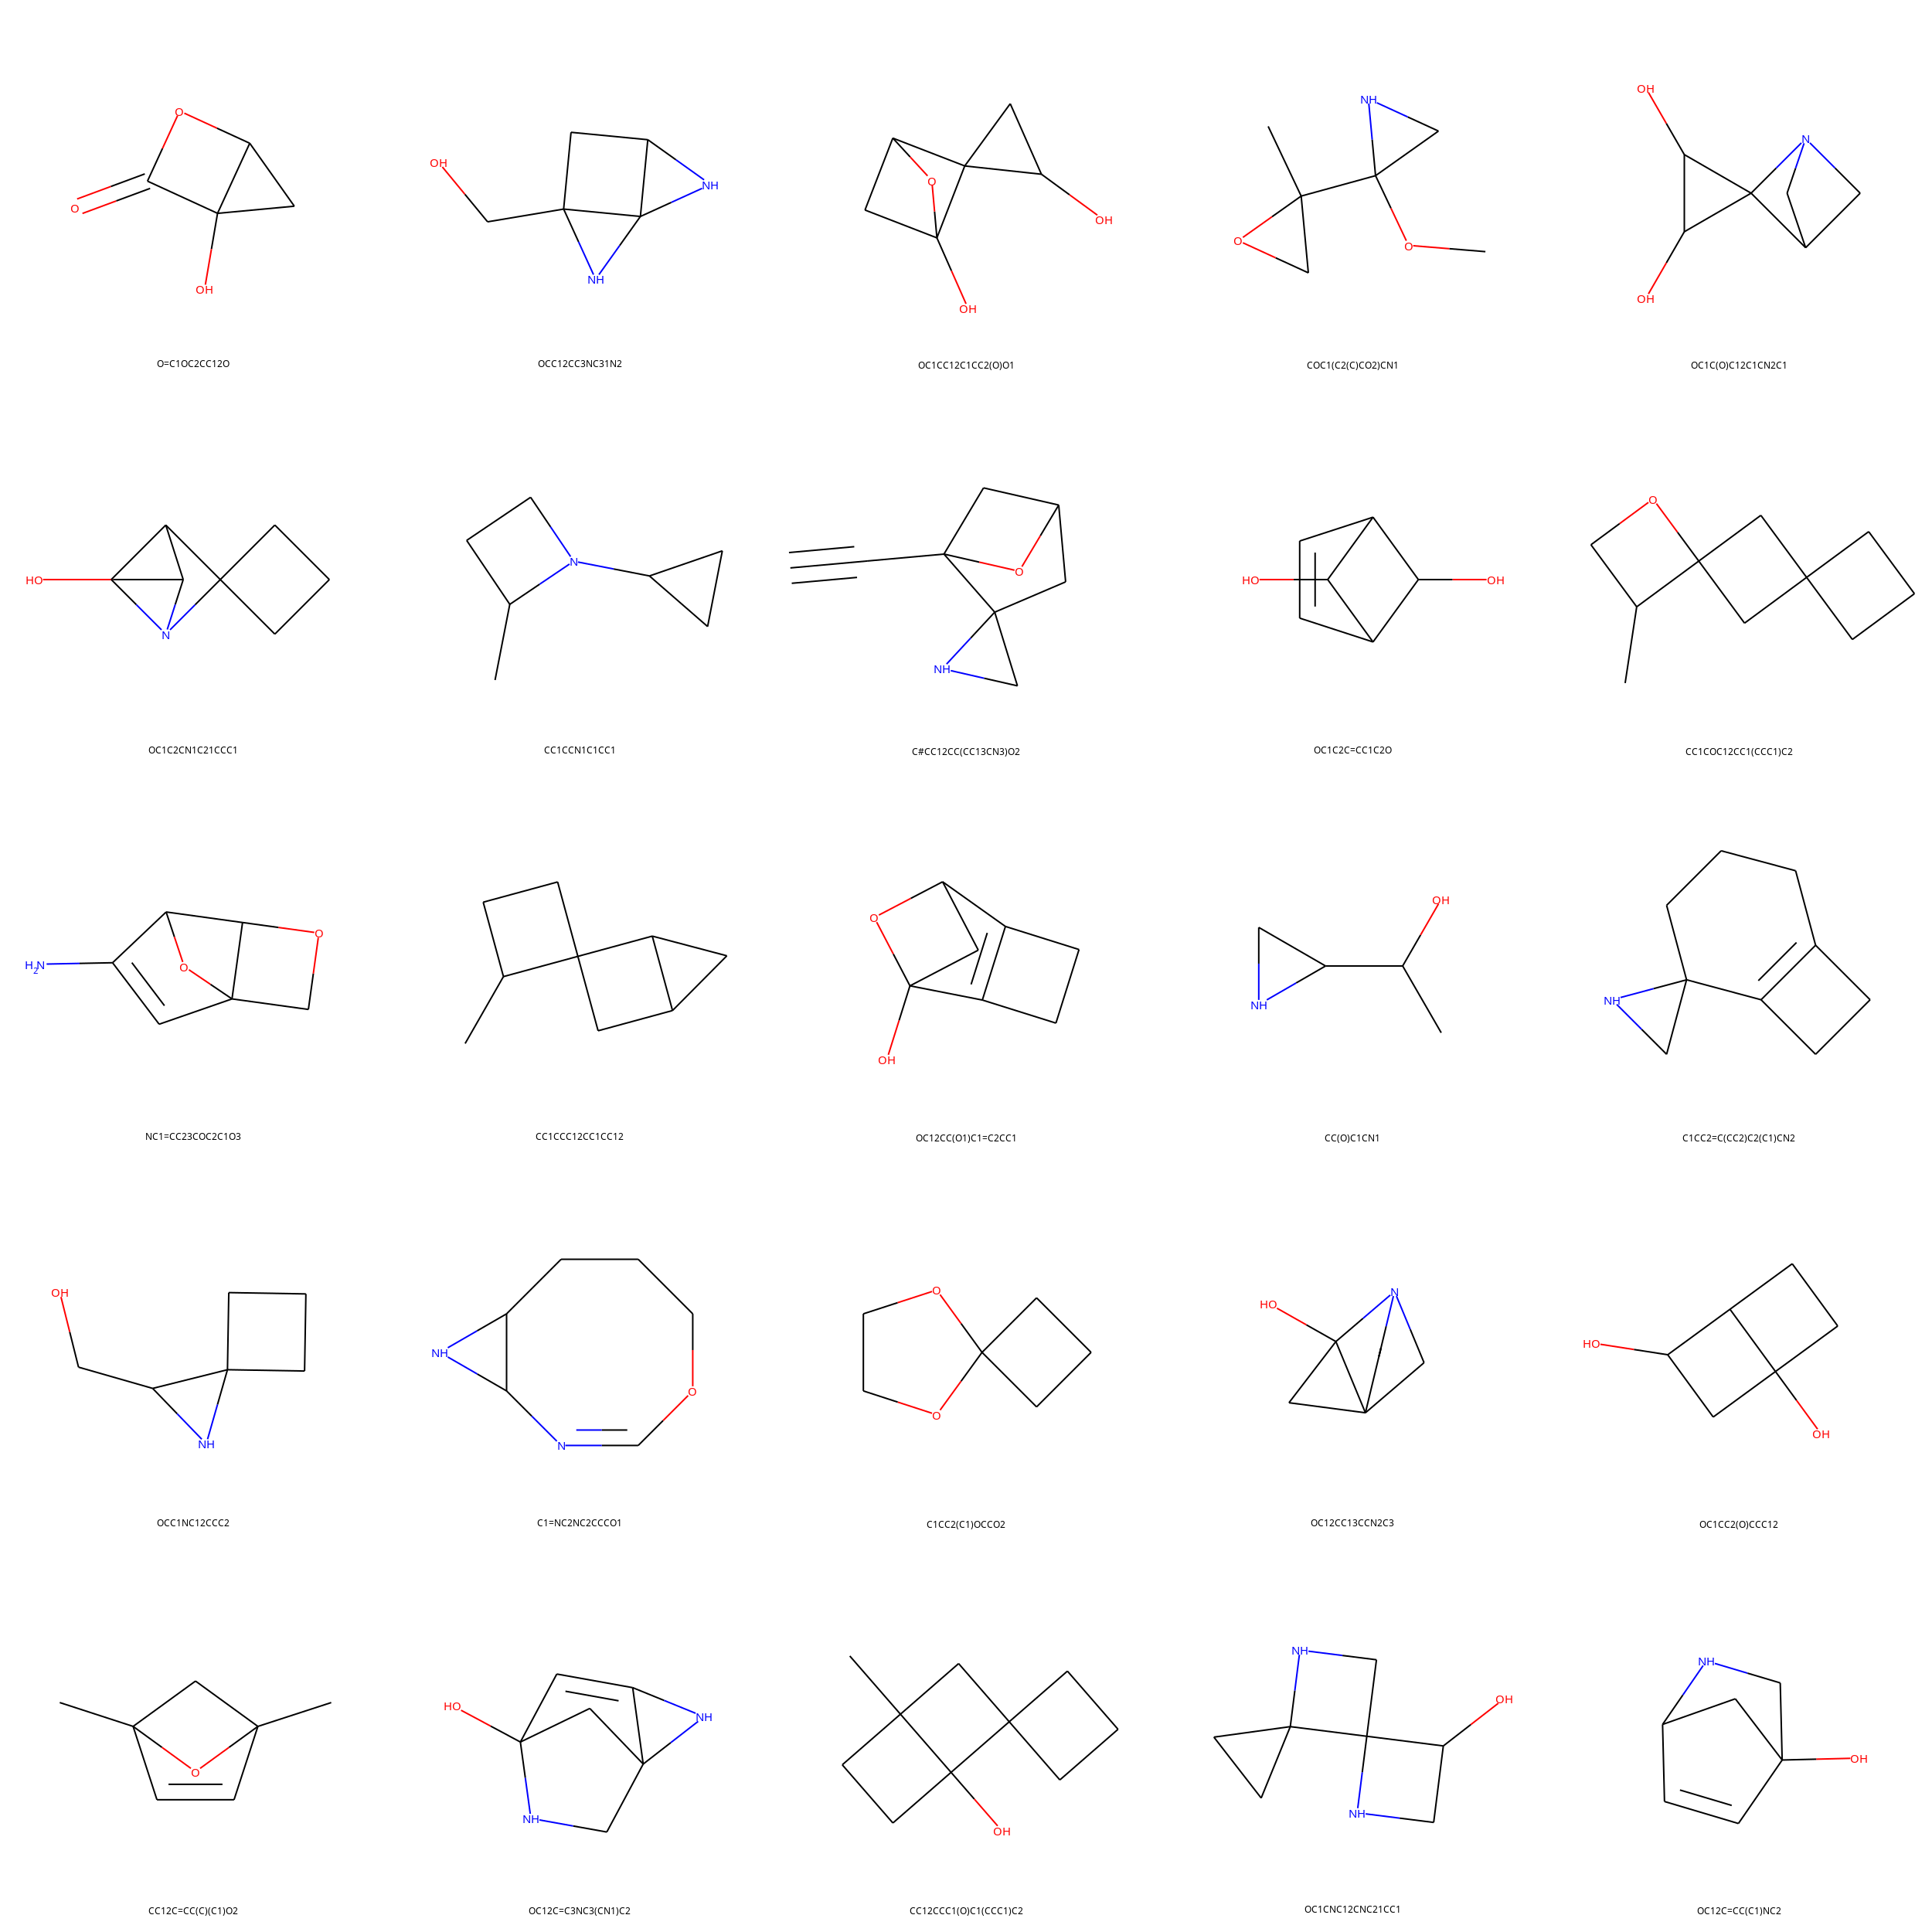

In [8]:
img_v3 = Draw.MolsToGridImage([Chem.MolFromSmiles(mol) for mol in list(samples_v3['SMILES'])[:25]], molsPerRow=5,subImgSize=(500,500), legends=list(samples_v3['SMILES'])[:100])
img_v3

## Validity

In [16]:
def is_valid_smiles(smiles):
    return Chem.MolFromSmiles(smiles) is not None

In [17]:
valid_samples = 0
samples_v3['Valid'] = samples_v3['SMILES'].apply(is_valid_smiles)
valid_samples = samples_v3['Valid'].sum()
print("Number of valid samples:", valid_samples)

Number of valid samples: 1000


In [18]:
samples_v3.head()   

SMILES  Valid                        INCHI
0        O=C1OC2CC1C2   True  GSPJYLZGRIZXHY-UHFFFAOYSA-N
1       CCC1=CC2CC1C2   True  UHNSXMSWYWVWOP-UHFFFAOYSA-N
2   NC1=COCC12C1CC2O1   True  MBNBQBVZIOPYIR-UHFFFAOYSA-N
3  c1c[nH]c(C2CCO2)c1   True  LDKOVJXKOXFRDO-UHFFFAOYSA-N
4      CC1C2CC1C2(C)O   True  NSIVYWNGVCAUSS-UHFFFAOYSA-N

## Uniqueness

In [19]:
unique_samples = samples_v3
unique_samples = unique_samples.drop_duplicates(subset=['INCHI'], keep='first')
unique_samples.head()
unique_samples.shape[0]

788

## Novelty

In [20]:
train_data = pd.read_csv('/home/ece/Inverse-Design-For-Molecules/data/10k_dataset/qm9_smiles_train.txt', names=['SMILES'])
train_data['INCHI'] = train_data['SMILES'].apply(lambda x: Chem.MolToInchiKey(Chem.MolFromSmiles(x)))
train_data.head()

SMILES                        INCHI
0                      Nc1onc2c1C=CC2  UJTFDMZYMCSKLN-UHFFFAOYSA-N
1                      C#Cc1cc(N)nn1C  OWXDHMFJLJJXLB-UHFFFAOYSA-N
2                 c1ncc([C@H]2CCO2)o1  ZYPBNAMMYXFQSB-RXMQYKEDSA-N
3  C[C@@]12C[C@H]3[C@H](C=O)N1[C@H]32  VXEJCIOPMXBNAX-YTWDBIDXSA-N
4                      CNC(=O)C(CO)CO  DWYREIBSNHAKPN-UHFFFAOYSA-N

In [21]:
novel_molecules = samples_v3[~samples_v3['INCHI'].isin(train_data['INCHI'])]
novel_molecules.head()
novel_molecules.shape[0]

993

In [15]:
novel_unique_molecules = unique_samples[~unique_samples['INCHI'].isin(train_data['INCHI'])]
novel_unique_molecules.shape[0]

867

# Property Prediction

## Load joint model

In [22]:
from fast_jtnn.joint_model_v3_3p import JTNNVAE_joint

# Paths to model and vocab files
vocab_path = './data/excluded1_vocab.txt'
model_path = './joint_training/excluded1/model.best'

# Load the saved state dictionary
saved_state = torch.load(model_path)

vocab = [x.strip("\r\n ") for x in open(vocab_path)] 
vocab = Vocab(vocab)

# Initialize and load the PropertyPredictor model
hidden_size = 450
latent_size = 56
depthT = 20
depthG = 3

model = JTNNVAE_joint(vocab, int(hidden_size), int(latent_size), int(depthT), int(depthG), property_weight=1, z_prop_size=14)
model.load_state_dict(torch.load(model_path))
model = model.cuda()


## Prediction on entire data

In [23]:
import numpy as np

entire_data = pd.read_csv('./data/excluded1_qm9_smiles_prop_normalized.csv')

# Calculate real average values
average_r2 = entire_data['r2'].mean()
average_lumo = entire_data['lumo'].mean()
average_homo = entire_data['homo'].mean()

# Calculate real standard deviations
std_r2 = entire_data['r2'].std()
std_lumo = entire_data['lumo'].std()
std_homo = entire_data['homo'].std()

smiles_list_all = entire_data['smiles'].tolist()
latent_points_test = []
batch_size = 32
predictions = []
for i in range(0, len(smiles_list_all), batch_size):
    batch = smiles_list_all[i:i+batch_size]
    properties = model.predict_property_from_smiles(batch)
    properties[:, 0] = properties[:, 0] * std_homo + average_homo
    properties[:, 1] = properties[:, 1] * std_lumo + average_lumo
    properties[:, 2] = properties[:, 2] * std_r2 + average_r2
    predictions.append(properties.detach().cpu().numpy())

predictions = np.vstack(predictions)
print(predictions.shape)

entire_data['pred_homo'] = predictions[:, 0]
entire_data['pred_lumo'] = predictions[:, 1]
entire_data['pred_r2'] = predictions[:, 2]

# Calculate predicted average values
average_r2_predicted = entire_data['pred_r2'].mean()
average_lumo_predicted = entire_data['pred_lumo'].mean()
average_homo_predicted = entire_data['pred_homo'].mean()

# Calculate predicted standard deviations
std_r2_predicted = entire_data['pred_r2'].std()
std_homo_predicted = entire_data['pred_homo'].std()
std_lumo_predicted = entire_data['pred_lumo'].std()

# Print real average values and standard deviations
print('Real:')
print(f'Average R2: {average_r2}')
print(f'Standard Deviation R2: {std_r2}')
print(f'Average HOMO: {average_homo}')
print(f'Standard Deviation HOMO: {std_homo}')
print(f'Average LUMO: {average_lumo}')
print(f'Standard Deviation LUMO: {std_lumo}')

# Print predicted average values and standard deviations
print('Predicted:')
print(f'Average R2: {average_r2_predicted}')
print(f'Standard Deviation R2: {std_r2_predicted}')
print(f'Average HOMO: {average_homo_predicted}')
print(f'Standard Deviation HOMO: {std_homo_predicted}')
print(f'Average LUMO: {average_lumo_predicted}')
print(f'Standard Deviation LUMO: {std_lumo_predicted}')

/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/torch/nn/functional.py:1956: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


(77364, 6)
Real:
Average R2: 1130.1039665774758
Standard Deviation R2: 275.67127500578374
Average HOMO: -0.24056326327491329
Standard Deviation HOMO: 0.021905646482926117
Average LUMO: 0.009300360632852422
Standard Deviation LUMO: 0.05046597136933291
Predicted:
Average R2: 1136.3291015625
Standard Deviation R2: 283.3376770019531
Average HOMO: -0.2415272444486618
Standard Deviation HOMO: 0.021583039313554764
Average LUMO: 0.00952922087162733
Standard Deviation LUMO: 0.050127267837524414


In [16]:
#entire_data.head()

### MAE on Entire Data

In [24]:
# Calculate real average values
average_r2 = entire_data['r2'].mean()
average_lumo = entire_data['lumo'].mean()
average_homo = entire_data['homo'].mean()

# Calculate real standard deviations
std_r2 = entire_data['r2'].std()
std_lumo = entire_data['lumo'].std()
std_homo = entire_data['homo'].std()

In [25]:
mae_r2 = np.mean(np.abs(entire_data['r2'] - entire_data['pred_r2']))
mae_avg_r2 = np.mean(np.abs(average_r2 - entire_data['r2']))

print(f"Mean Absolute Error (MAE): {mae_r2}")
print(f"MAE between average: {mae_avg_r2}")

Mean Absolute Error (MAE): 20.7491863677333
MAE between average: 163.4392298094444


In [26]:
mae_homo = np.mean(np.abs(entire_data['homo'] - entire_data['pred_homo']))
mae_avg_homo = np.mean(np.abs(average_homo - entire_data['homo']))

print(f"Mean Absolute Error (MAE): {mae_homo}")
print(f"MAE between average: {mae_avg_homo}")

Mean Absolute Error (MAE): 0.003135126149904014
MAE between average: 0.01597680241213893


In [27]:
mae_lumo = np.mean(np.abs(entire_data['lumo'] - entire_data['pred_lumo']))
mae_avg_lumo = np.mean(np.abs(average_lumo - entire_data['lumo']))

print(f"Mean Absolute Error (MAE): {mae_lumo}")
print(f"MAE between average: {mae_avg_lumo}")

Mean Absolute Error (MAE): 0.003039304997124979
MAE between average: 0.04327995135774216


### Plot

/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

/home/ece/mi

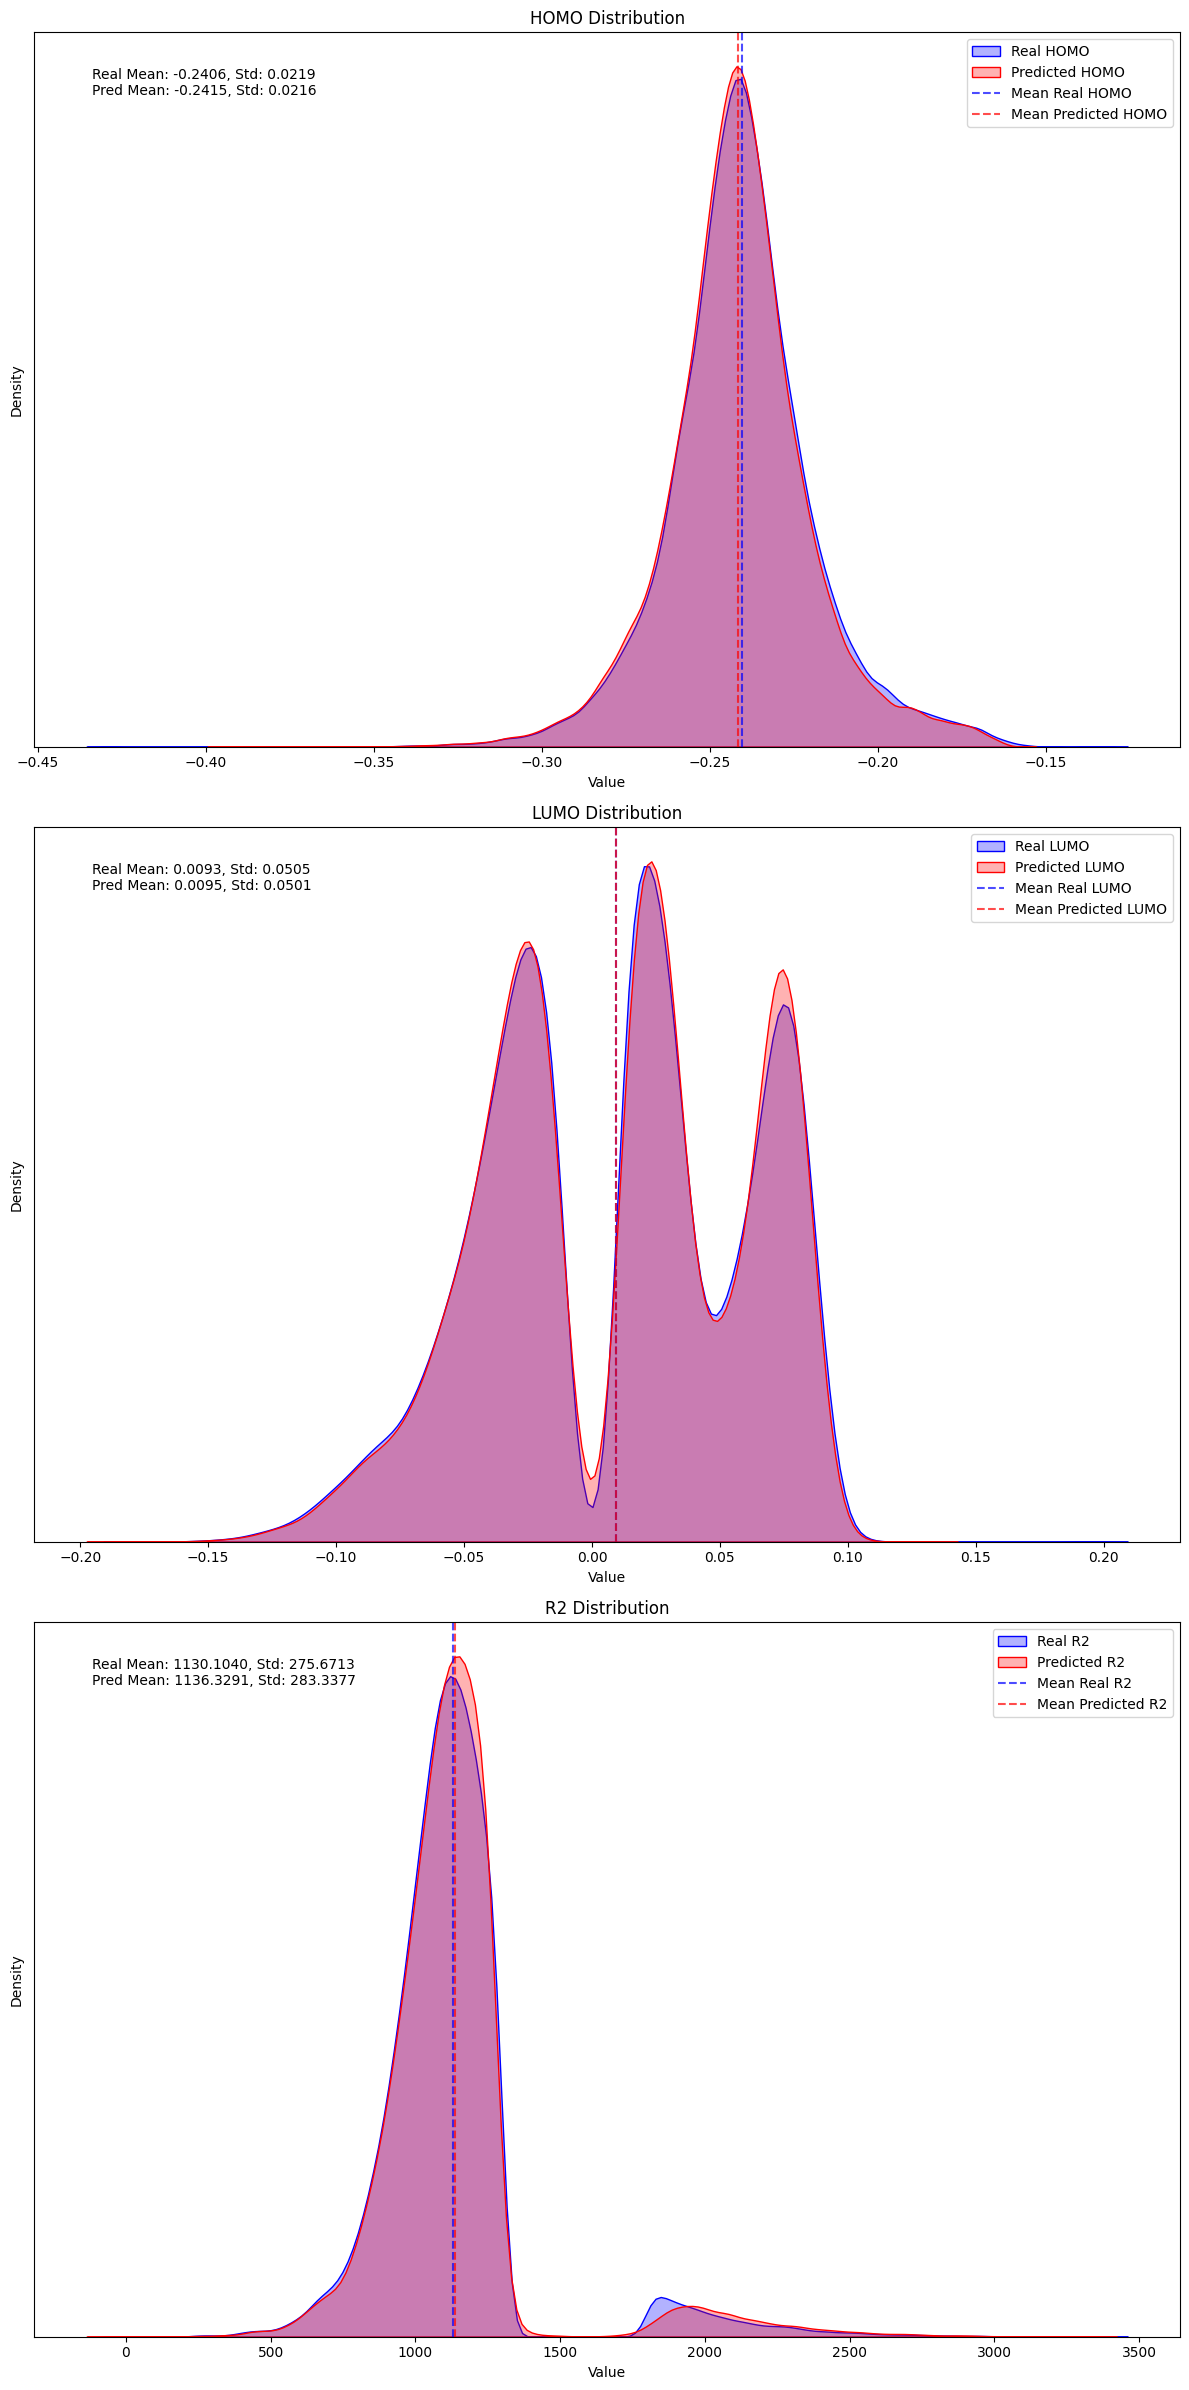

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_kde_with_mean(entire_data, save_path=None):

    # Use a 1-row, 1-column subplot for now, changeable for multiple properties later
    fig, axes = plt.subplots(3, 1, figsize=(12, 24))
    
    # Keep 'properties' as a list for easy expansion in the future
    properties = ['homo', 'lumo', 'r2']
    colors = {'real': 'blue', 'pred': 'red'}

    # For now, even with multiple properties, you would need only one axis
    if not isinstance(axes, np.ndarray):
        axes = [axes]

    for i, prop in enumerate(properties):
        real_data = entire_data[f'{prop}']
        pred_data = entire_data[f'pred_{prop}']
        
        # Plot KDE for real and predicted data
        for data, label, color in zip([real_data, pred_data], 
                                        [f'Real {prop.upper()}', f'Predicted {prop.upper()}'],
                                        [colors['real'], colors['pred']]):
            sns.kdeplot(data, ax=axes[i], label=label, color=color, shade=True, alpha=0.3)
        
        # Add vertical lines for mean values
        axes[i].axvline(real_data.mean(), color=colors['real'], linestyle='--', alpha=0.7, label=f'Mean Real {prop.upper()}')
        axes[i].axvline(pred_data.mean(), color=colors['pred'], linestyle='--', alpha=0.7, label=f'Mean Predicted {prop.upper()}')
        
        axes[i].set_title(f'{prop.upper()} Distribution')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Density')
        axes[i].legend()
        
        # Remove y-axis labels as density values are not particularly meaningful
        axes[i].set_yticks([])
        
        # Add text annotations for mean and std
        text = f"Real Mean: {real_data.mean():.4f}, Std: {real_data.std():.4f}\n"
        text += f"Pred Mean: {pred_data.mean():.4f}, Std: {pred_data.std():.4f}"
        axes[i].text(0.05, 0.95, text, transform=axes[i].transAxes, verticalalignment='top', fontsize=10)

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    else:
        plt.show()

# Test the function with the corrected version
plot_kde_with_mean(entire_data, save_path='./plots/v3_entire_data_1/25percent_on_entire_data.png')


## Property Prediction on Test Data

In [29]:
import numpy as np

test_data = pd.read_csv('./data/excluded1_qm9_smiles_test.csv')

# Calculate real average values
average_r2 = entire_data['r2'].mean()
average_lumo = entire_data['lumo'].mean()
average_homo = entire_data['homo'].mean()

# Calculate real standard deviations
std_r2 = entire_data['r2'].std()
std_lumo = entire_data['lumo'].std()
std_homo = entire_data['homo'].std()

smiles_list_all = test_data['smiles'].tolist()
latent_points_test = []
batch_size = 32
predictions = []
for i in range(0, len(smiles_list_all), batch_size):
    batch = smiles_list_all[i:i+batch_size]
    properties = model.predict_property_from_smiles(batch)
    properties[:, 0] = properties[:, 0] * std_homo + average_homo
    properties[:, 1] = properties[:, 1] * std_lumo + average_lumo
    properties[:, 2] = properties[:, 2] * std_r2 + average_r2
    predictions.append(properties.detach().cpu().numpy())

predictions = np.vstack(predictions)
print(predictions.shape)

test_data['pred_homo'] = predictions[:, 0]
test_data['pred_lumo'] = predictions[:, 1]
test_data['pred_r2'] = predictions[:, 2]

# Calculate predicted average values
average_r2_predicted = test_data['pred_r2'].mean()
average_lumo_predicted = test_data['pred_lumo'].mean()
average_homo_predicted = test_data['pred_homo'].mean()

# Calculate predicted standard deviations
std_r2_predicted = test_data['pred_r2'].std()
std_homo_predicted = test_data['pred_homo'].std()
std_lumo_predicted = test_data['pred_lumo'].std()

# Values for input data
# Calculate real average values
average_r2 = test_data['r2'].mean()
average_lumo = test_data['lumo'].mean()
average_homo = test_data['homo'].mean()

# Calculate real standard deviations
std_r2 = test_data['r2'].std()
std_lumo = test_data['lumo'].std()
std_homo = test_data['homo'].std()

# Print real average values and standard deviations
print('Real:')
print(f'Average R2: {average_r2}')
print(f'Standard Deviation R2: {std_r2}')
print(f'Average HOMO: {average_homo}')
print(f'Standard Deviation HOMO: {std_homo}')
print(f'Average LUMO: {average_lumo}')
print(f'Standard Deviation LUMO: {std_lumo}')

# Print predicted average values and standard deviations
print('Predicted:')
print(f'Average R2: {average_r2_predicted}')
print(f'Standard Deviation R2: {std_r2_predicted}')
print(f'Average HOMO: {average_homo_predicted}')
print(f'Standard Deviation HOMO: {std_homo_predicted}')
print(f'Average LUMO: {average_lumo_predicted}')
print(f'Standard Deviation LUMO: {std_lumo_predicted}')

/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/torch/nn/functional.py:1956: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


(7737, 6)
Real:
Average R2: 1127.5750247511974
Standard Deviation R2: 272.8390818714173
Average HOMO: -0.24057073801214912
Standard Deviation HOMO: 0.021752666381646427
Average LUMO: 0.010542393692645752
Standard Deviation LUMO: 0.050705449693326625
Predicted:
Average R2: 1132.8892822265625
Standard Deviation R2: 280.07928466796875
Average HOMO: -0.24156329035758972
Standard Deviation HOMO: 0.02129506878554821
Average LUMO: 0.010767539031803608
Standard Deviation LUMO: 0.05026029422879219


In [30]:
test_data.head()

smiles    homo    lumo         r2  \
0      O=CC1(C=O)C[C@H]2N[C@H]21 -0.2443 -0.0498  1041.9007   
1  CC1(C)[C@H]2C[C@@H]3[C@H]2N31 -0.2331  0.0908   805.1409   
2      O=C1[C@@H](O)CN2C[C@@H]12 -0.2423 -0.0361   781.4147   
3               C[C@H](C#N)NCCCO -0.2418  0.0299  2192.5707   
4                 COc1oc(=O)oc1C -0.2247  0.0276  1186.3487   

                         INCHI  pred_homo  pred_lumo      pred_r2  
0  OZSPTRQJXPMVSD-RFZPGFLSSA-N  -0.248784  -0.046286  1046.203613  
1  NWZDOJUAXXMKKQ-QFZFJQMPSA-N  -0.230691   0.088402   799.184265  
2  WVGJPIUETNBCFB-IUJOKSNGSA-N  -0.244496  -0.040277   843.081787  
3  AWJYUIKIPFZJEV-ZCFIWIBFSA-N  -0.246619   0.036052  2133.838867  
4  RXRONLCWSWEBNO-UHFFFAOYSA-N  -0.225616   0.024839  1193.052002

### MAE on Test Data

In [31]:
mae = np.mean(np.abs(test_data['r2'] - test_data['pred_r2']))

print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 24.72485823753246


In [32]:
mae_homo = np.mean(np.abs(test_data['homo'] - test_data['pred_homo']))

print(f"Mean Absolute Error (MAE): {mae_homo}")

Mean Absolute Error (MAE): 0.0038447354141618343


In [33]:
mae_lumo = np.mean(np.abs(test_data['lumo'] - test_data['pred_lumo']))

print(f"Mean Absolute Error (MAE): {mae_lumo}")

Mean Absolute Error (MAE): 0.003783771076171827


### Plots

/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

/home/ece/mi

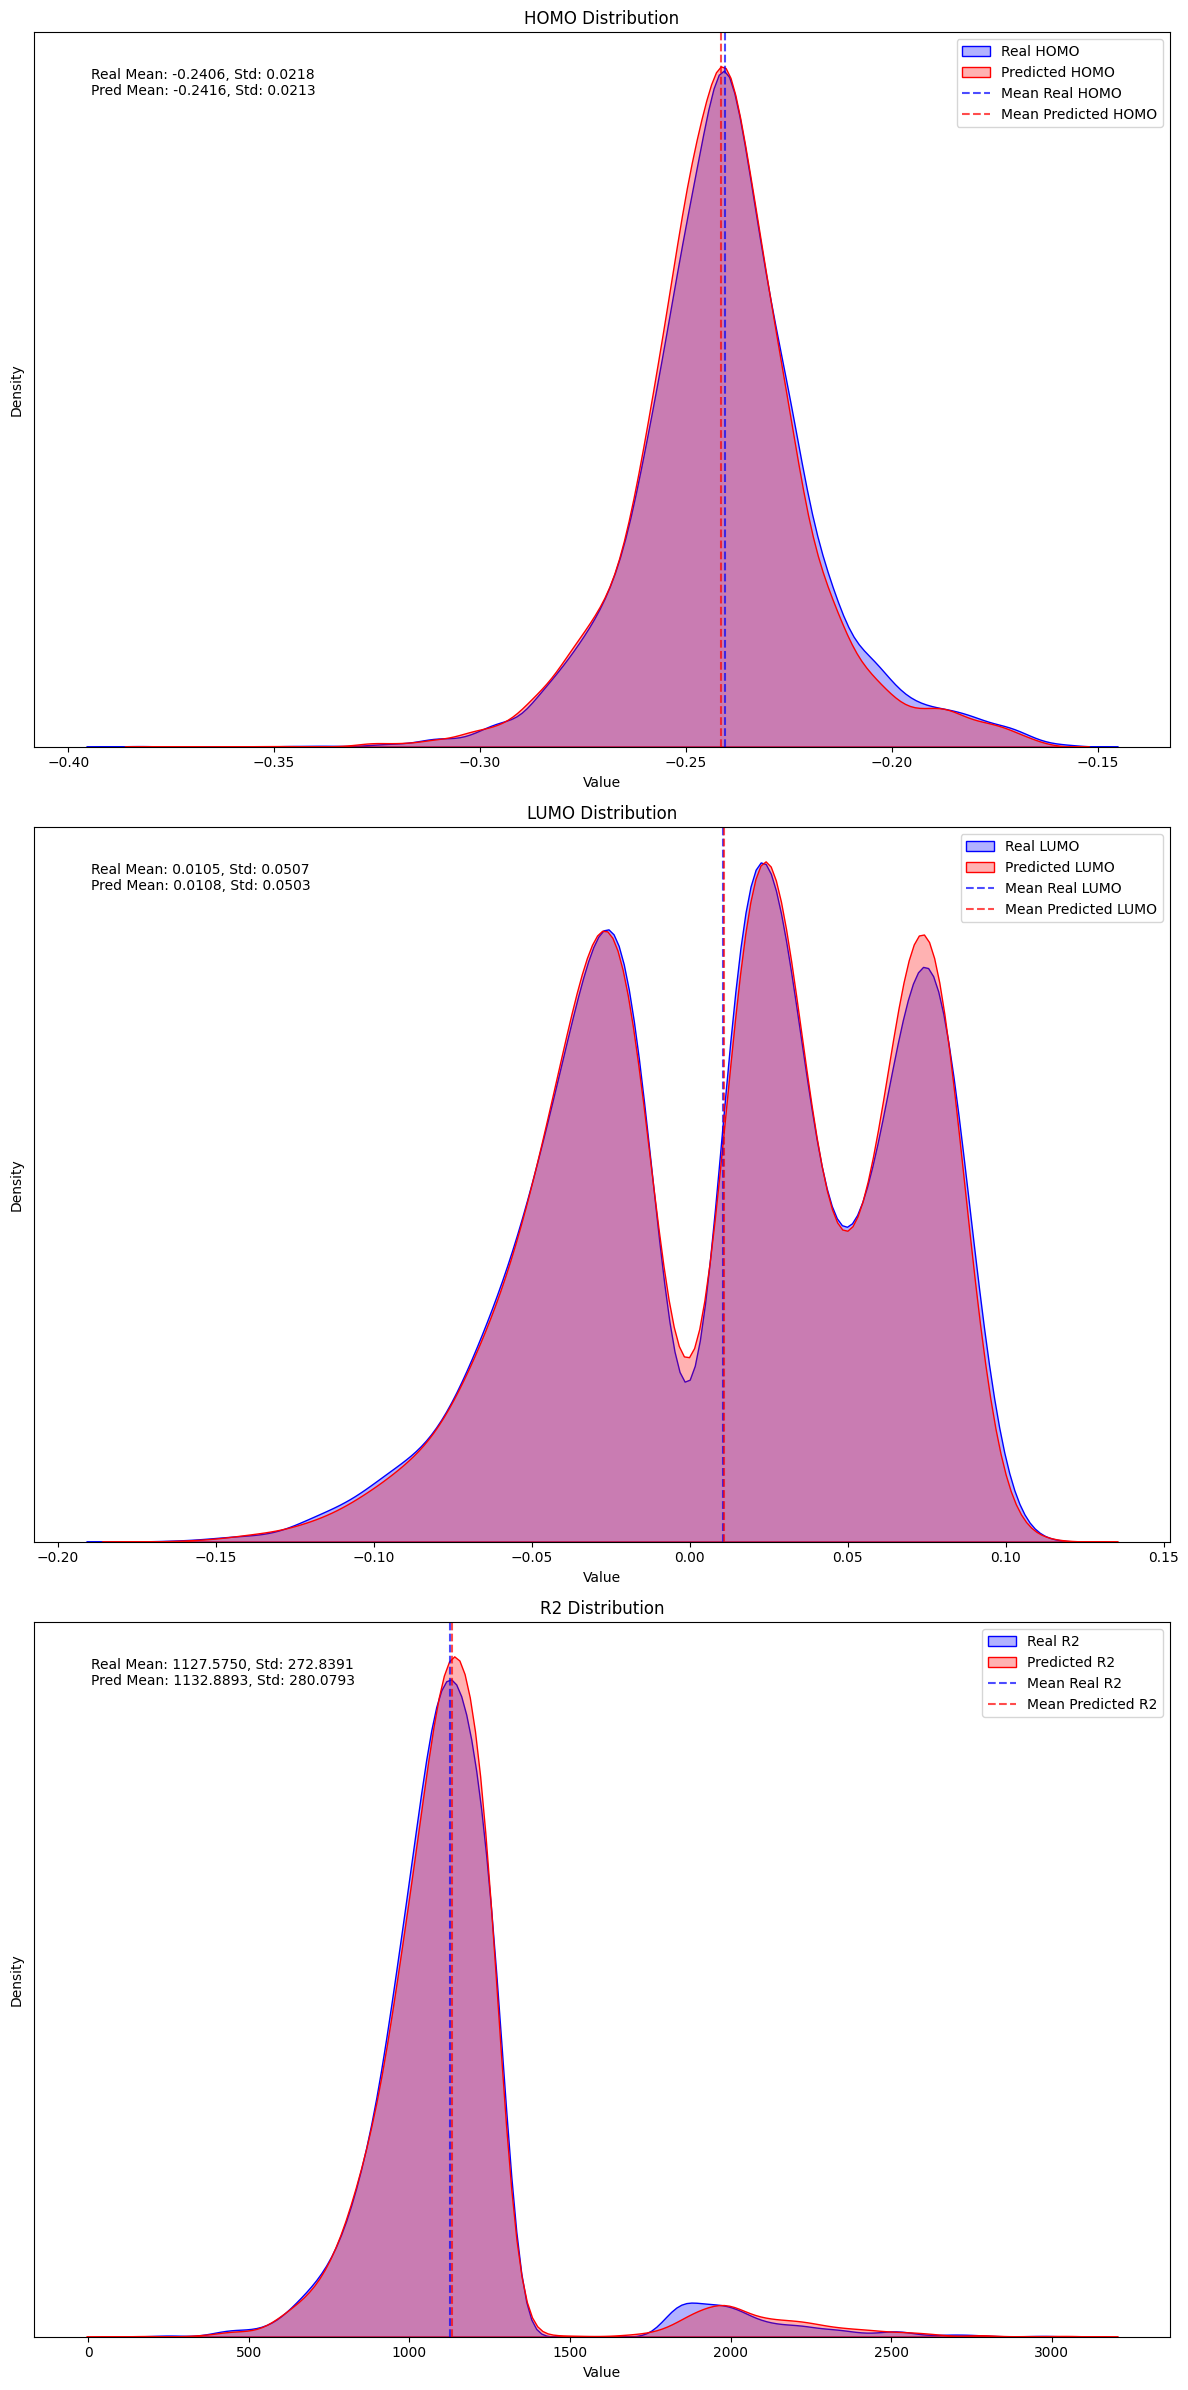

In [34]:
plot_kde_with_mean(test_data, save_path='./plots/v3_entire_data_1/25percent_on_test_data.png')

## Property Prediction on Sampled Data

In [35]:
import torch
import numpy as np
import pandas as pd

entire_data = pd.read_csv('./data/excluded1_qm9_smiles_prop_normalized.csv')
output_file = '/home/ece/Inverse-Design-For-Molecules/joint_training/excluded1/v3_excluded_1.txt'

# Calculate real average values
average_r2 = entire_data['r2'].mean()
average_lumo = entire_data['lumo'].mean()
average_homo = entire_data['homo'].mean()

# Calculate real standard deviations
std_r2 = entire_data['r2'].std()
std_lumo = entire_data['lumo'].std()
std_homo = entire_data['homo'].std()

# Load sampled SMILES strings
with open(output_file, 'r') as f:
    sampled_smiles_list = [line.strip() for line in f]

# Initialize lists for SMILES strings and latent points predictions
latent_points_samples = []
batch_size = 32
predictions = []
valid_smiles = []

# Iterating through SMILES in batches
for i in range(0, len(sampled_smiles_list), batch_size):
    batch = sampled_smiles_list[i:i+batch_size]
    print(f"Processing batch {i//batch_size + 1}/{len(sampled_smiles_list)//batch_size + 1}")
    
    try:
        properties = model.predict_property_from_smiles(batch)
        properties[:, 0] = properties[:, 0] * std_homo + average_homo
        properties[:, 1] = properties[:, 1] * std_lumo + average_lumo
        properties[:, 2] = properties[:, 2] * std_r2 + average_r2
        predictions.append(properties.detach().cpu().numpy())

        valid_smiles.extend(batch)
    except KeyError as e:
        print(f"Skipping invalid SMILES in batch: {e}")
        # Optionally, you can process the batch individually to keep valid SMILES
        for smiles in batch:
            try:
                properties = model.predict_property_from_smiles(batch)
                properties[:, 0] = properties[:, 0] * std_homo + average_homo
                properties[:, 1] = properties[:, 1] * std_lumo + average_lumo
                properties[:, 2] = properties[:, 2] * std_r2 + average_r2
                predictions.append(properties.detach().cpu().numpy())

                valid_smiles.append(smiles)
            except KeyError:
                print(f"Skipping invalid SMILES: {smiles}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Concatenate predictions into a single numpy array
predictions = np.vstack(predictions)

# Create a DataFrame to hold the valid SMILES and the predicted values
sampled_data = pd.DataFrame({
    'smiles': valid_smiles,
    'pred_homo': predictions[:, 0],
    'pred_lumo': predictions[:, 1],
    'pred_r2': predictions[:, 2]
})

# Calculate predicted average values
average_r2_predicted = sampled_data['pred_r2'].mean()
average_lumo_predicted = sampled_data['pred_lumo'].mean()
average_homo_predicted = sampled_data['pred_homo'].mean()

# Calculate predicted standard deviations
std_r2_predicted = sampled_data['pred_r2'].std()
std_homo_predicted = sampled_data['pred_homo'].std()
std_lumo_predicted = sampled_data['pred_lumo'].std()

# Print predicted average values and standard deviations
print('Predicted:')
print(f'Average R2: {average_r2_predicted}')
print(f'Standard Deviation R2: {std_r2_predicted}')
print(f'Average HOMO: {average_homo_predicted}')
print(f'Standard Deviation HOMO: {std_homo_predicted}')
print(f'Average LUMO: {average_lumo_predicted}')
print(f'Standard Deviation LUMO: {std_lumo_predicted}')

Processing batch 1/32
Processing batch 2/32
Processing batch 3/32
Processing batch 4/32
Skipping invalid SMILES in batch: 'C1=CO1'
Skipping invalid SMILES: CC(C)O
Skipping invalid SMILES: CC1=C(CO)C2CC1O2
Skipping invalid SMILES: COC12CC(C1)C21CC1


/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/torch/nn/functional.py:1956: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Skipping invalid SMILES: CC1C(=O)C2CC1O2
Skipping invalid SMILES: C1OCC1C1COC1
Skipping invalid SMILES: CC1CCC=CCO1
Skipping invalid SMILES: CN1CC(=O)C1O
Skipping invalid SMILES: C1OC23CC(N2)C13
Skipping invalid SMILES: CC1C(=O)CC12CC2
Skipping invalid SMILES: CC12CC3OCC31CO2
Skipping invalid SMILES: O=C1N2CC13CNC23
Skipping invalid SMILES: O=CC1C2CN1C2
Skipping invalid SMILES: C1CCC2=C(CC1)O2
Skipping invalid SMILES: CCC12COC1N2
Skipping invalid SMILES: C#CC12CC(C1)O2
Skipping invalid SMILES: C1CC(C2CC2)C1
Skipping invalid SMILES: CC12CC(C)(C1)O2
Skipping invalid SMILES: CCC1C2CC1C2O
Skipping invalid SMILES: CC1N=CNC1=O
Skipping invalid SMILES: CC1C2NC1C2C
Skipping invalid SMILES: C1=COCC2(C1)C1CC2O1
Skipping invalid SMILES: NC1N2C(=O)C13CC23
Skipping invalid SMILES: O=C1C2C=CC1(CO)C2
Skipping invalid SMILES: OC1C2CC13NCC23
Skipping invalid SMILES: C1=CCC2(CC1)COC2
Skipping invalid SMILES: CC12CC13CC2O3
Skipping invalid SMILES: COC1CC1
Skipping invalid SMILES: CC12CC(C1)C21CC1O
Skippi

In [36]:
sampled_data.head()

smiles  pred_homo  pred_lumo      pred_r2
0        O=C1OC2CC1C2  -0.236456  -0.013975   592.205078
1       CCC1=CC2CC1C2  -0.195817   0.013696  1014.142334
2   NC1=COCC12C1CC2O1  -0.236925  -0.028211   981.981995
3  c1c[nH]c(C2CCO2)c1  -0.199263   0.037273  1230.246582
4      CC1C2CC1C2(C)O  -0.211170  -0.013416   858.500916

### Plots

/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

/home/ece/mi

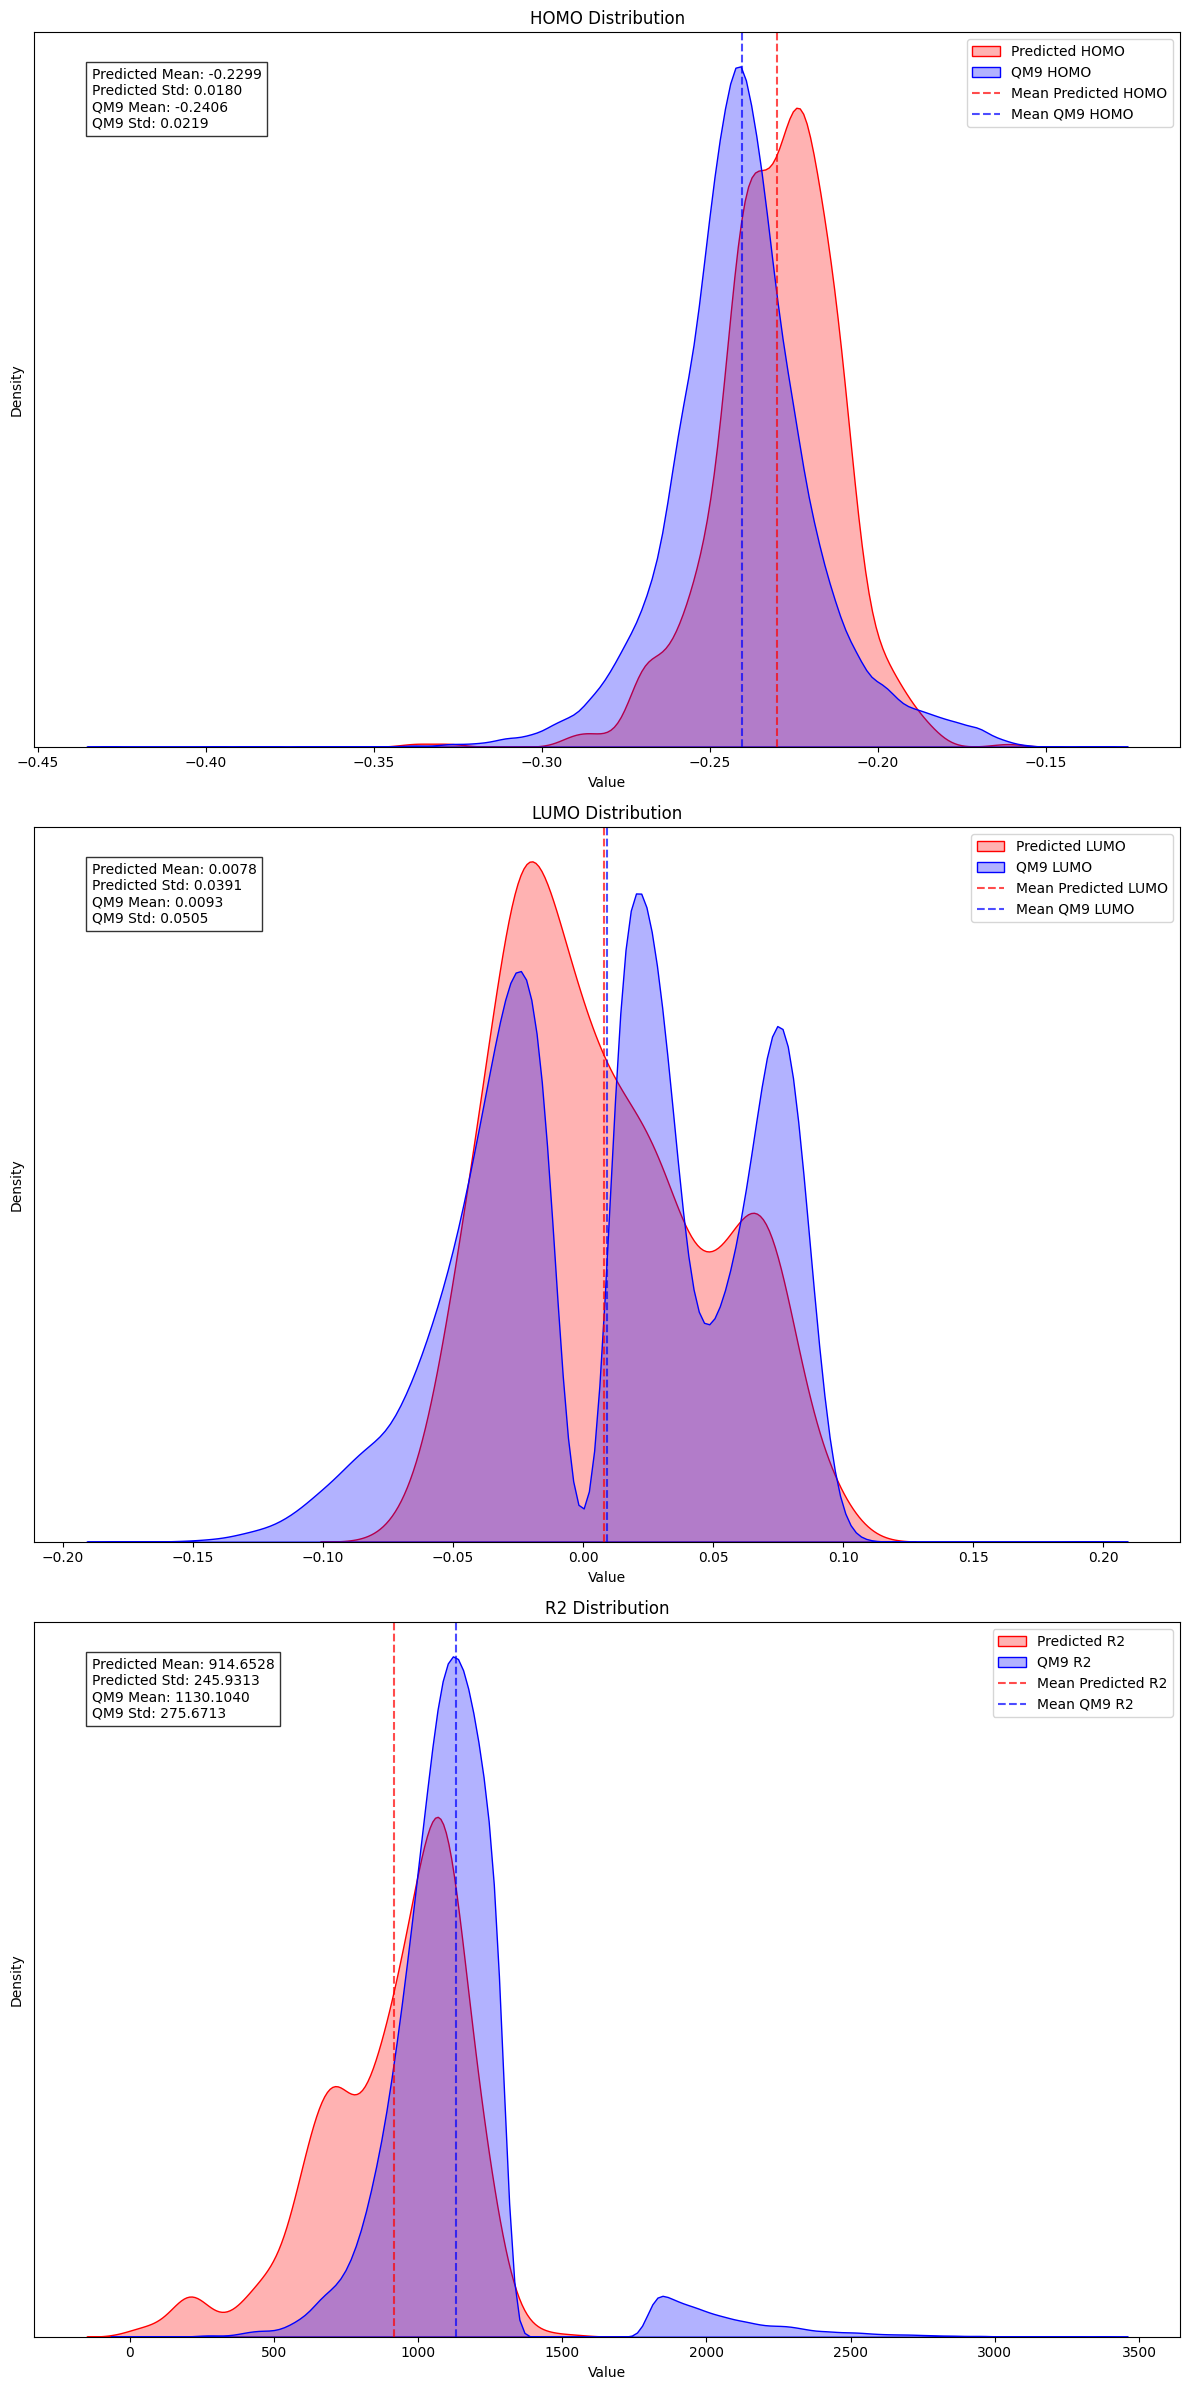

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_kde_samples(entire_data, qm9_data, save_path=None):
    fig, axes = plt.subplots(3, 1, figsize=(12, 24))
    
    # Keep 'properties' as a list for easy expansion in the future
    properties = ['homo', 'lumo', 'r2']
    colors = {'pred': 'red', 'qm9': 'blue'}
    
    # Ensure axes is always a list for consistency
    if not isinstance(axes, np.ndarray):
        axes = [axes]
    
    for i, prop in enumerate(properties):
        # Get predicted and QM9 data
        pred_data = entire_data[f'pred_{prop}']
        real_data = qm9_data[prop]
        
        # Plot KDE for predicted data
        sns.kdeplot(pred_data, ax=axes[i], label=f'Predicted {prop.upper()}', 
                   color=colors['pred'], shade=True, alpha=0.3)
        
        # Plot KDE for QM9 data
        sns.kdeplot(real_data, ax=axes[i], label=f'QM9 {prop.upper()}', 
                   color=colors['qm9'], shade=True, alpha=0.3)
        
        # Add vertical lines for mean values
        axes[i].axvline(pred_data.mean(), color=colors['pred'], linestyle='--', 
                       alpha=0.7, label=f'Mean Predicted {prop.upper()}')
        axes[i].axvline(real_data.mean(), color=colors['qm9'], linestyle='--', 
                       alpha=0.7, label=f'Mean QM9 {prop.upper()}')
        
        axes[i].set_title(f'{prop.upper()} Distribution')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Density')
        axes[i].legend()
        
        # Remove y-axis labels as density values are not particularly meaningful
        axes[i].set_yticks([])
        
        # Add text annotations for mean and std
        text = f"Predicted Mean: {pred_data.mean():.4f}\n"
        text += f"Predicted Std: {pred_data.std():.4f}\n"
        text += f"QM9 Mean: {real_data.mean():.4f}\n"
        text += f"QM9 Std: {real_data.std():.4f}"
        axes[i].text(0.05, 0.95, text, transform=axes[i].transAxes, 
                    verticalalignment='top', fontsize=10,
                    bbox=dict(facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    else:
        plt.show()

plot_kde_samples(sampled_data, entire_data, save_path='./plots/v3_entire_data_1/25percent_sampled_with_qm9.png')

## Prediction on Non-Novel Samples

In [38]:
entire_data = pd.read_csv('./data/excluded1_qm9_smiles_prop_normalized.csv')

# Extract matching SMILES
matching_smiles = sampled_data[sampled_data['smiles'].isin(entire_data['smiles'])]
matching_smiles.head()
matching_smiles.shape[0]

100

In [39]:
# Merge dataframes to get real values from entire_data and predicted values from sampled_data
merged_data = matching_smiles.merge(entire_data[['smiles', 'r2', 'homo', 'lumo']], on='smiles')
merged_data.head()

smiles  pred_homo  pred_lumo      pred_r2         r2    homo  \
0  CCC12CN(C1)C21CC1  -0.225544   0.082105  1197.647949  1210.3466 -0.2263   
1  C1OCC1C12CN(C1)C2  -0.231168   0.069880  1196.145996  1196.1542 -0.2306   
2               CC#N  -0.337457   0.030783    66.152588   160.7223 -0.3264   
3                 CO  -0.277625   0.059240   319.494751    83.7940 -0.2653   
4                 CO  -0.276994   0.059342   319.231934    83.7940 -0.2653   

     lumo  
0  0.0816  
1  0.0704  
2  0.0376  
3  0.0784  
4  0.0784

In [40]:
# Calculate mean and standard deviation for real and predicted values
average_r2_real = merged_data['r2'].mean()
std_r2_real = merged_data['r2'].std()

average_r2_pred = merged_data['pred_r2'].mean()
std_r2_pred = merged_data['pred_r2'].std()

# Print the results
print('Real:')
print(f'Average R2: {average_r2_real}')
print(f'Standard Deviation R2: {std_r2_real}')

print('Predicted:')
print(f'Average R2: {average_r2_pred}')
print(f'Standard Deviation R2: {std_r2_pred}')

# Calculate mean and standard deviation for real and predicted values
average_homo_real = merged_data['homo'].mean()
std_homo_real = merged_data['homo'].std()

average_homo_pred = merged_data['pred_homo'].mean()
std_homo_pred = merged_data['pred_homo'].std()

# Print the results
print('Real:')
print(f'Average HOMO: {average_homo_real}')
print(f'Standard Deviation HOMO: {std_homo_real}')

print('Predicted:')
print(f'Average HOMO: {average_homo_pred}')
print(f'Standard Deviation HOMO: {std_homo_pred}')

# Calculate mean and standard deviation for real and predicted values
average_lumo_real = merged_data['lumo'].mean()
std_lumo_real = merged_data['lumo'].std()

average_lumo_pred = merged_data['pred_lumo'].mean()
std_lumo_pred = merged_data['pred_lumo'].std()

# Print the results
print('Real:')
print(f'Average LUMO: {average_lumo_real}')
print(f'Standard Deviation LUMO: {std_lumo_real}')

print('Predicted:')
print(f'Average LUMO: {average_lumo_pred}')
print(f'Standard Deviation LUMO: {std_lumo_pred}')

Real:
Average R2: 608.1468319999996
Standard Deviation R2: 377.3299682858446
Predicted:
Average R2: 636.091064453125
Standard Deviation R2: 349.3444519042969
Real:
Average HOMO: -0.24777099999999994
Standard Deviation HOMO: 0.02675032443870088
Predicted:
Average HOMO: -0.24956443905830383
Standard Deviation HOMO: 0.026264391839504242
Real:
Average LUMO: 0.027093999999999993
Standard Deviation LUMO: 0.05018182660298567
Predicted:
Average LUMO: 0.02493460848927498
Standard Deviation LUMO: 0.04922027885913849


### MAE on Non-Novel Data

In [41]:
mae = np.mean(np.abs(merged_data['r2'] - merged_data['pred_r2']))
print(f"Mean Absolute Error (MAE): {mae}")

mae = np.mean(np.abs(merged_data['homo'] - merged_data['pred_homo']))
print(f"Mean Absolute Error (MAE): {mae}")

mae = np.mean(np.abs(merged_data['lumo'] - merged_data['pred_lumo']))
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 44.57944374121094
Mean Absolute Error (MAE): 0.004900499361991881
Mean Absolute Error (MAE): 0.0052927820571362985


### Plots

/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

/home/ece/mi

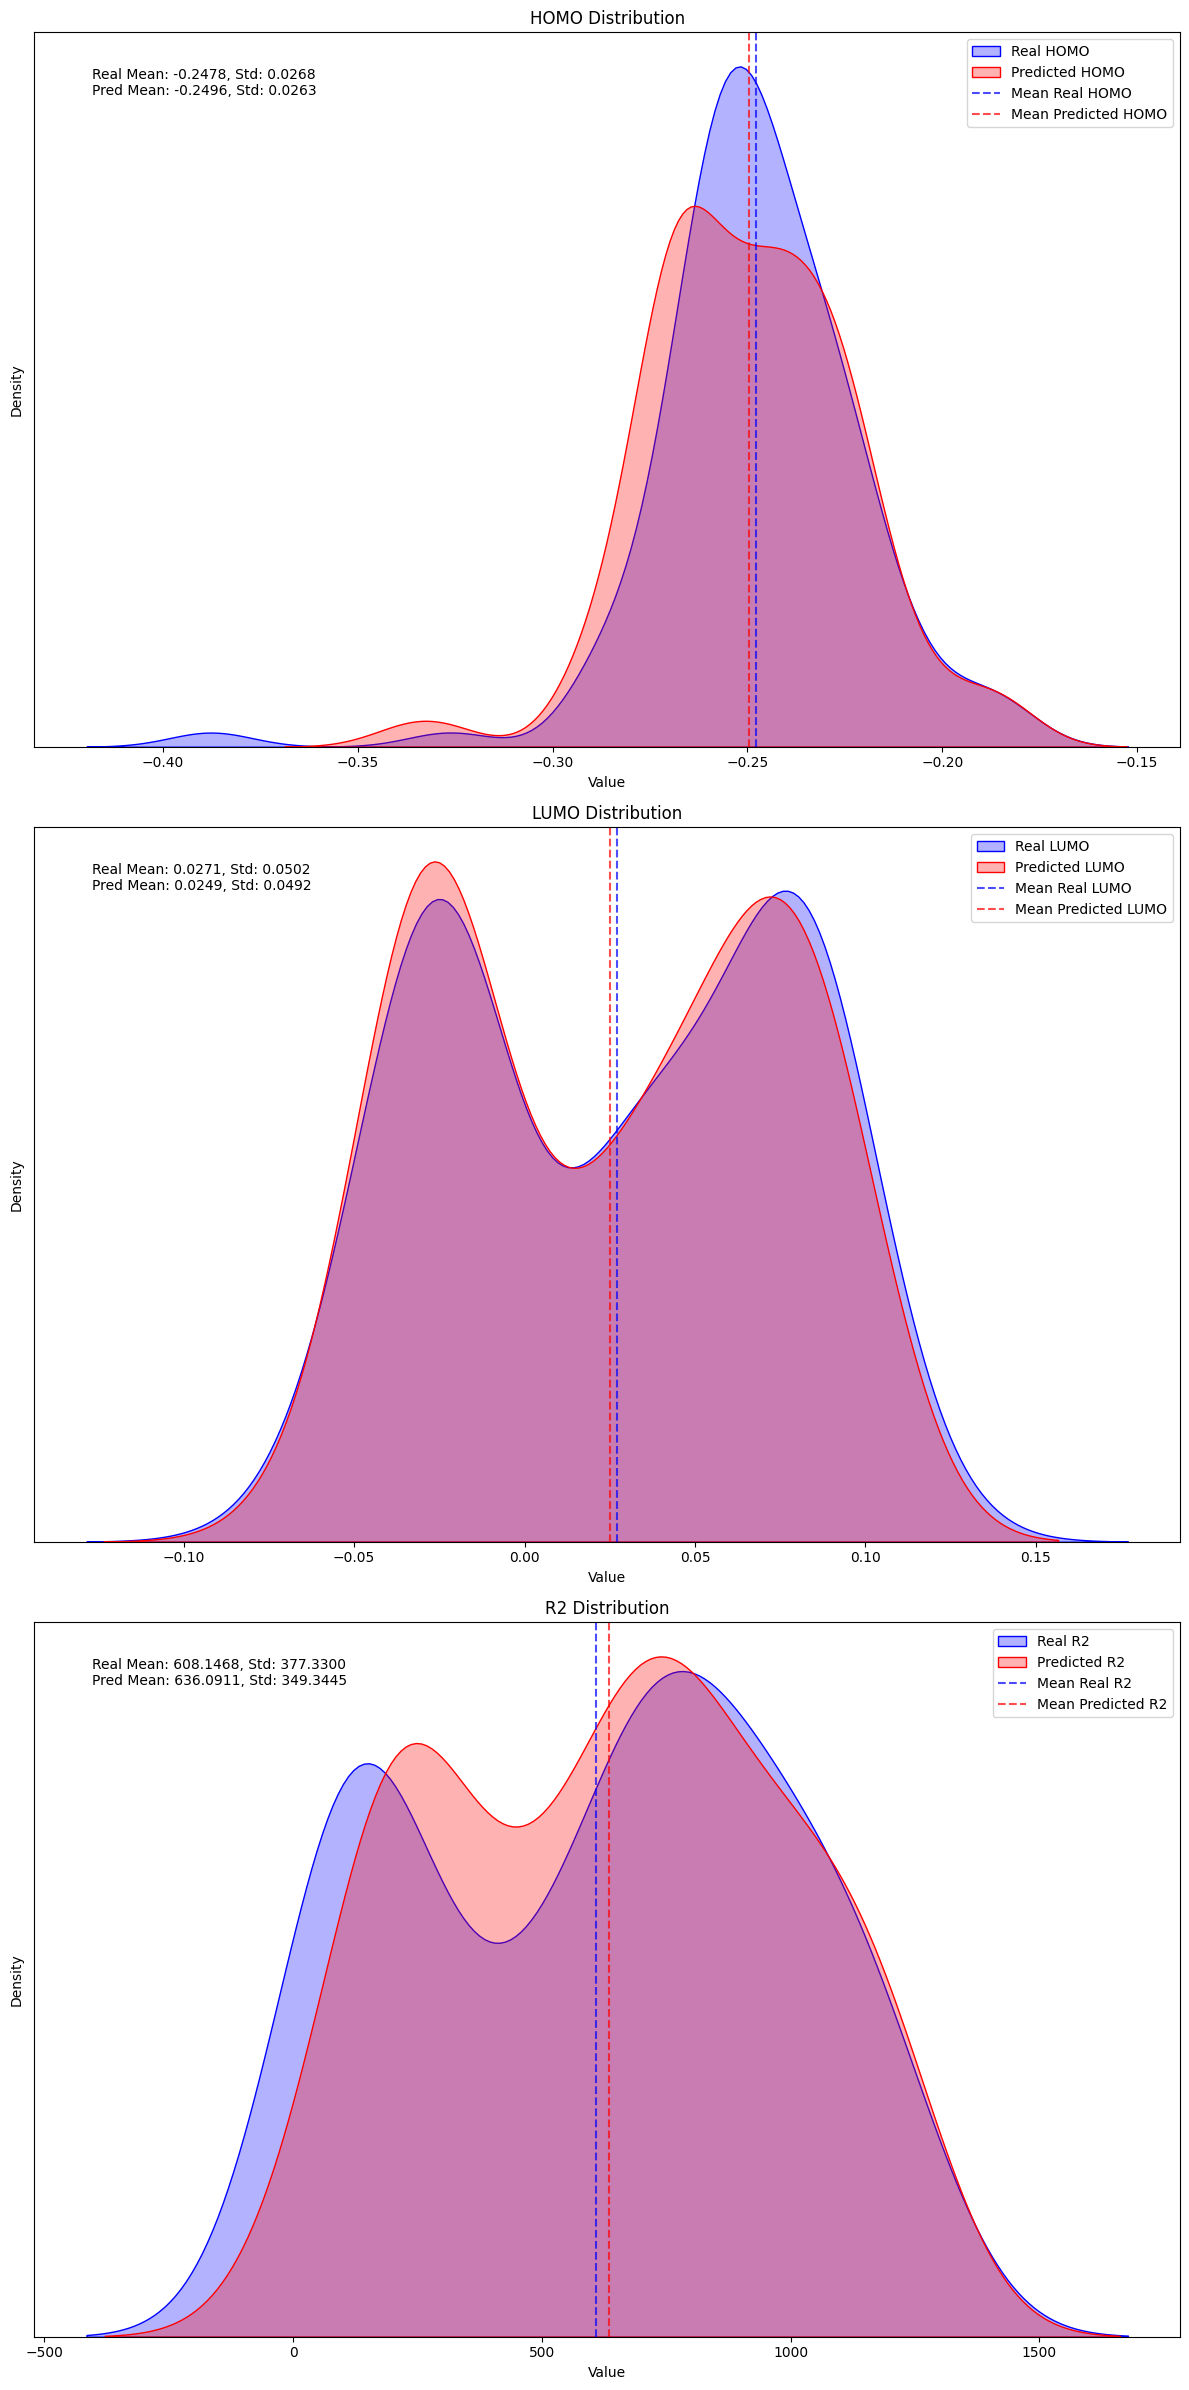

In [42]:
plot_kde_with_mean(merged_data, save_path='./plots/v3_entire_data_1/25percent_sampled_not_novel.png')

# Figures

## Load Model

In [2]:
from fast_jtnn.joint_model_v3_3p import JTNNVAE_joint

# Paths to model and vocab files
vocab_path = './data/excluded1_vocab.txt'
model_path = './joint_training/excluded1/model.best'

# Load the saved state dictionary
saved_state = torch.load(model_path)

vocab = [x.strip("\r\n ") for x in open(vocab_path)] 
vocab = Vocab(vocab)

# Initialize and load the PropertyPredictor model
hidden_size = 450
latent_size = 56
depthT = 20
depthG = 3

model = JTNNVAE_joint(vocab, int(hidden_size), int(latent_size), int(depthT), int(depthG), property_weight=1, z_prop_size=14)
model.load_state_dict(torch.load(model_path))
model = model.cuda()


## Interpolation (Figure 1)

In [12]:
import torch
import random
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Draw
from PIL import Image

def read_smiles(file_path):
    with open(file_path, 'r') as file:
        smiles_list = [line.strip() for line in file.readlines()]
    return smiles_list

def slerp(val, low, high):
    # Normalize low and high vectors
    low_norm = low / torch.norm(low, dim=-1, keepdim=True)
    high_norm = high / torch.norm(high, dim=-1, keepdim=True)
    
    # Compute dot product (batch-wise)
    dot = torch.sum(low_norm * high_norm, dim=-1, keepdim=True)
    
    # Clamp the dot product to avoid numerical errors
    omega = torch.acos(torch.clamp(dot, -1, 1))
    so = torch.sin(omega)
    
    # Handle the case where omega is zero (low and high are the same)
    if torch.any(so == 0):
        return (1.0 - val) * low + val * high
    
    # Perform spherical interpolation
    interp = (torch.sin((1.0 - val) * omega) / so) * low + (torch.sin(val * omega) / so) * high
    return interp

def visualize_single_molecule(smiles, title="Molecule", subImgSize=(300, 300)):
    """Visualize a single molecule from SMILES string"""
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        raise ValueError(f"Could not process SMILES: {smiles}")
    
    Chem.SanitizeMol(mol)
    mol = Chem.RemoveHs(mol)
    
    img = Draw.MolToImage(mol, size=subImgSize, legend=title)
    return img

def sample_two_smiles(smiles_list):
    return 'C[C@H]1C[C@H]2O[C]([NH])C[C@@H]12', 'O=CN(C=O)C=O'

def interpolate_and_decode(model, smiles_list, steps=6):
    # Sample two random molecules
    smiles_1, smiles_2 = 'C[C@H]1C[C@H]2O[C]([NH])C[C@@H]12', 'O=CN(C=O)C=O'
    
    # Encode SMILES to latent space
    z_1 = model.encode_from_smiles([smiles_1])
    z_2 = model.encode_from_smiles([smiles_2])
    
    # Interpolation
    interpolated_smiles = []
    interpolated_vectors = []
    for i in range(steps):
        alpha = i / (steps - 1)  # Interpolation factor
        z_interpolated = slerp(alpha, z_1, z_2)
        interpolated_vectors.append(z_interpolated)
        decoded_mol = model.decode(z_interpolated[:, :model.latent_size], z_interpolated[:, model.latent_size:], prob_decode=False)
        interpolated_smiles.append(decoded_mol)
    
    # Calculate average latent distance
    avg_latent_distance = calculate_average_latent_distance(interpolated_vectors)
    
    return interpolated_smiles, avg_latent_distance, (smiles_1, smiles_2)

def calculate_average_latent_distance(vectors):
    distances = []
    for i in range(len(vectors) - 1):
        distance = torch.norm(vectors[i] - vectors[i+1])
        distances.append(distance.item())
    return np.mean(distances)

def visualize_smiles(smiles_list, molsPerRow=4, subImgSize=(300, 300)):
    mols = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:
            Chem.SanitizeMol(mol)
            mol = Chem.RemoveHs(mol)
            mols.append(mol)
        else:
            print(f"Warning: Could not process SMILES: {smiles}")
    
    if not mols:
        raise ValueError("No valid molecules to visualize")

    img = Draw.MolsToGridImage(mols, 
                               molsPerRow=molsPerRow, 
                               subImgSize=subImgSize, 
                               legends=[f'Step {i+1}' for i in range(len(mols))],
                               useSVG=False)
    
    return img

def main_interpolate(model, file_path):
    smiles_list = read_smiles(file_path)
    
    interpolated_smiles, avg_latent_distance, (start_smiles, end_smiles) = interpolate_and_decode(model, smiles_list, steps=8)

    # Create complete list of SMILES including start, interpolated, and end
    all_smiles = [start_smiles] + interpolated_smiles + [end_smiles]
    
    try:
        # Visualize all molecules in a single grid
        mols = []
        for smiles in all_smiles:
            mol = Chem.MolFromSmiles(smiles)
            if mol is not None:
                Chem.SanitizeMol(mol)
                mol = Chem.RemoveHs(mol)
                mols.append(mol)
            else:
                print(f"Warning: Could not process SMILES: {smiles}")
        
        if not mols:
            raise ValueError("No valid molecules to visualize")

        legends = ["Start"] + [f"Step {i+1}" for i in range(len(interpolated_smiles))] + ["End"]
        img = Draw.MolsToGridImage(mols, 
                                 molsPerRow=5, 
                                 subImgSize=(300, 300), 
                                 legends=legends,
                                 useSVG=False)
        
        # Display the complete visualization
        plt.figure(figsize=(20,10))
        plt.imshow(img)
        plt.axis('off')
        plt.show()
        
    except Exception as e:
        print(f"Error in visualizing molecules: {e}")
        print("Proceeding without visualization.")

    print(f"Average latent distance between interpolated molecules: {avg_latent_distance:.4f}")
    
    for i, sm in enumerate(interpolated_smiles):
        print(f"Step {i + 1}: {sm}")

RDKit ERROR: [18:41:33] Explicit valence for atom # 1 C, 5, is greater than permitted
[18:41:33] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [18:41:33] Explicit valence for atom # 1 C, 5, is greater than permitted
[18:41:33] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [18:41:33] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [18:41:33] Explicit valence for atom # 1 C, 5, is greater than permitted
[18:41:33] Explicit valence for atom # 1 C, 5, is greater than permitted
[18:41:33] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [18:41:33] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [18:41:33] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [18:41:33] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [18:41:33] Explicit valence for atom # 1 C, 5, is greater than permitted
[18:41:33] Explicit 

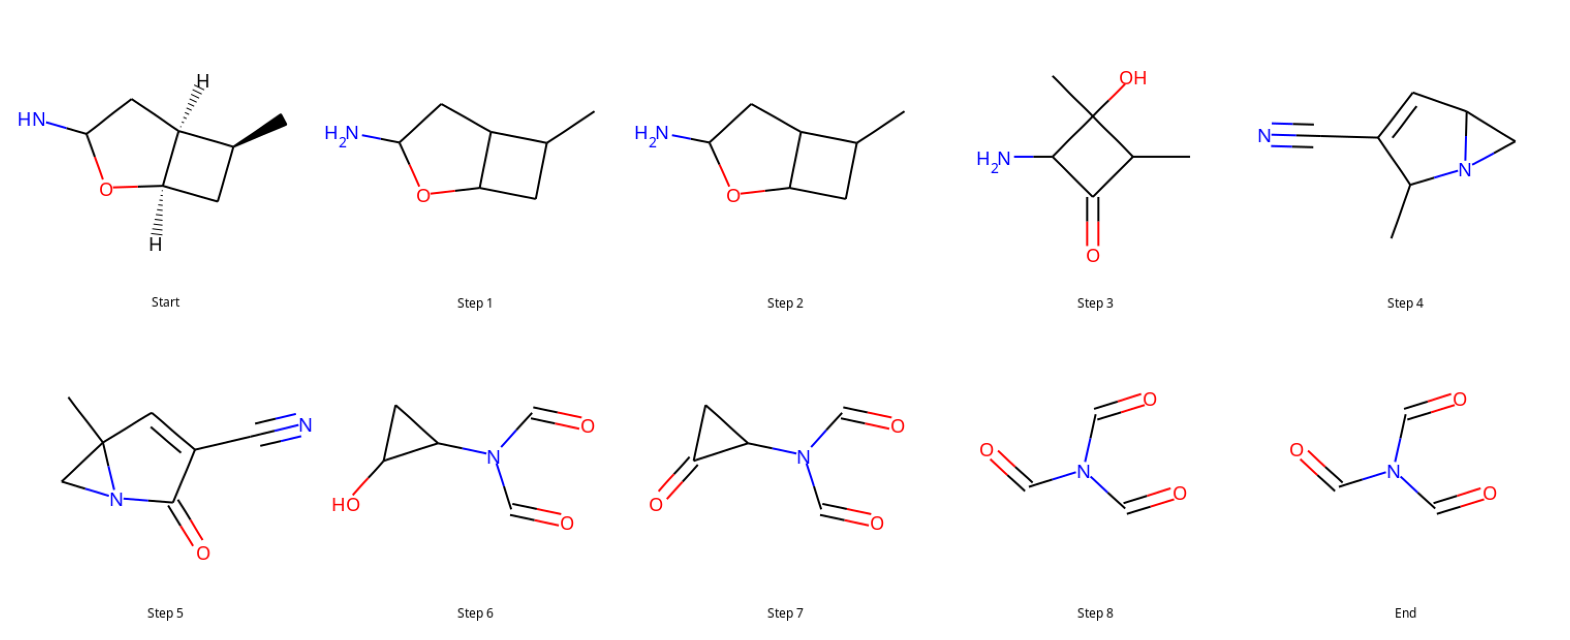

Average latent distance between interpolated molecules: 2.1778
Step 1: CC1CC2OC(N)CC12
Step 2: CC1CC2OC(N)CC12
Step 3: CC1C(=O)C(N)C1(C)O
Step 4: CC1C(C#N)=CC2CN21
Step 5: CC12C=C(C#N)C(=O)N1C2
Step 6: O=CN(C=O)C1CC1O
Step 7: O=CN(C=O)C1CC1=O
Step 8: O=CN(C=O)C=O


In [13]:
file_path = './data/qm9_smiles.txt'  
main_interpolate(model, file_path)


## Calculating Average Latent Distance in Files

In [14]:
import torch
from tqdm import tqdm

def calculate_average_latent_distance_from_file(model, file_path, batch_size=32):
    smiles_list = read_smiles(file_path)
    total_distance = 0
    total_pairs = 0
    latent_vectors = []
    valid_smiles = []

    # Process SMILES in batches
    for i in tqdm(range(0, len(smiles_list), batch_size)):
        batch = smiles_list[i:i+batch_size]
        valid_batch = []
        batch_vectors = []

        for smiles in batch:
            try:
                vector = model.encode_from_smiles([smiles])
                batch_vectors.append(vector)
                valid_batch.append(smiles)
            except KeyError:
                print(f"Skipping invalid SMILES: {smiles}")
            except Exception as e:
                print(f"An unexpected error occurred for SMILES {smiles}: {e}")

        if batch_vectors:
            batch_vectors = torch.cat(batch_vectors, dim=0)

            # Calculate distances within this batch
            for j in range(len(batch_vectors)):
                for k in range(j+1, len(batch_vectors)):
                    distance = torch.norm(batch_vectors[j] - batch_vectors[k])
                    total_distance += distance.item()
                    total_pairs += 1

            # Calculate distances between this batch and previous batches
            for prev_vector in latent_vectors:
                for batch_vector in batch_vectors:
                    distance = torch.norm(prev_vector - batch_vector)
                    total_distance += distance.item()
                    total_pairs += 1

            # Store the vectors from this batch
            latent_vectors.extend(batch_vectors)
            valid_smiles.extend(valid_batch)

        # Clear CUDA cache to free up memory
        torch.cuda.empty_cache()

    if total_pairs == 0:
        print("No valid pairs found to calculate average distance.")
        return None

    avg_latent_distance = total_distance / total_pairs
    print(f"Average latent distance for molecules in {file_path}: {avg_latent_distance:.4f}")
    print(f"Total valid SMILES processed: {len(valid_smiles)}")
    return avg_latent_distance, valid_smiles

In [15]:
calculate_average_latent_distance_from_file(model, "./joint_training/v3_entire_data/v3_entire_1.txt")

  6%|▋         | 2/32 [00:00<00:04,  6.04it/s]

Skipping invalid SMILES: NC1CCC2=C(NC1)N2
Skipping invalid SMILES: C1=CC2=C(CCC1)N2


 16%|█▌        | 5/32 [00:00<00:05,  5.05it/s]

Skipping invalid SMILES: N=c1oc2c(o1)N2


 44%|████▍     | 14/32 [00:03<00:05,  3.20it/s]

Skipping invalid SMILES: O=C1C2C3=C(N3)C12O


 69%|██████▉   | 22/32 [00:06<00:04,  2.37it/s]

Skipping invalid SMILES: CC1(O)CCC2=C1N2


 78%|███████▊  | 25/32 [00:08<00:03,  2.15it/s]

Skipping invalid SMILES: C1CNC2(C1)CC1=C(C2)N1


100%|██████████| 32/32 [00:11<00:00,  2.74it/s]

Average latent distance for molecules in ./joint_training/v3_entire_data/v3_entire_1.txt: 12.6318
Total valid SMILES processed: 994


(12.63184985968877,
 ['OC1CCC1N1CC1',
  'NC12C=CC(N1)C2=O',
  'OCC12CC1CCN2',
  'O=C1CN2C3CC12C3',
  'CC#CC1C2CN1C2',
  'NC12CC(CO)(C1)N2',
  'C1=C2CC2CCOC1',
  'C1=CC2(CC1)C1CC=CN12',
  'OCC12CC=CC1N2',
  'O=C1CNC12C1CC2C1',
  'C1C2N1CC21CC2(CN2)C1',
  'O=CC1CC(O)C1',
  'OC1CCC1N1CC1',
  'Nc1ccnc(O)c1',
  'NC1CNC2(NC2O)O1',
  'OC1CC1C1(O)CC1',
  'O=C1CC(O)C12CC2',
  'CNC(C)CC(=O)O',
  'CC(NO)C1COCO1',
  'C1=CC2CC1C2C1CN1',
  'C1CC2C3(C1)CCC1CC123',
  'NC12CCC(N1)C2=O',
  'N#CC1(O)C2CC1(N)N2',
  'CC12NC(O)(C1=O)C2=O',
  'CC12CC(N)(N1)C21CC1O',
  'C1=CC2(CC2)OCCC1',
  'OC1CNC(O)C12CC2',
  'Cc1onnc1O',
  'CC1CCN2CC12C',
  'O=CC(O)C1CC1O',
  'O=C1CN2CC1C2O',
  'OC1(C2CC2)C=CCC1',
  'NC12C3NC1(C3O)C2O',
  'O=C1C(O)C=C2CC12O',
  'CC1CCC1C1CN1',
  'C1=CC2(CC1)CCC1CN12',
  'N#CC1C2C=CC1C2',
  'OC1CC2(C1)C1C=CCC12O',
  'CC1C(N)CCC1O',
  'CC12CCC13CN2C3',
  'OC12CC(O)(C1)C2',
  'OCC1C2C=CC1C2',
  'Nc1nonc1C1CC1',
  'OC12C=CCC1CC2',
  'COC1CC2CC2C1',
  'O=C1CNC(O)C1',
  'N#CC12CC13CC2C3',
  'OC1

## Neighborhood and L2 Distance (Figure 3)

In [45]:
import torch
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Draw
import pandas as pd
from tqdm import tqdm
import numpy as np

def plot_latent_neighbors(model, smiles_list, mol_index: int, device='cuda'):
    """
    Sample points in the latent neighborhood of the specified molecule and plot.
    """
    # Plot the input molecule
    print("Input Molecule")
    input_smiles = smiles_list[mol_index]
    input_mol = Chem.MolFromSmiles(input_smiles)
    img_input = Draw.MolsToGridImage([input_mol], molsPerRow=1, subImgSize=(500,500), legends=[input_smiles])
    plt.figure(figsize=(10, 10))
    plt.imshow(img_input)
    plt.axis("off")
    plt.show()

    # Encode the input molecule
    z = model.encode_from_smiles([input_smiles])

    # Sample points in the latent space at increasing distances from the encoded input molecule
    decode_count = 32
    decoded_mols = dict()
    for c in tqdm(range(decode_count)):
        with torch.no_grad():
            noise_vec = torch.randn_like(z, device=device)
            noise_vec_norm = noise_vec / torch.norm(noise_vec, p=2, dim=1, keepdim=True)
            noise_scale = 24 * torch.rand(size=(1,), device=device)
            z_current = z + noise_vec_norm * noise_scale
            distance = torch.norm(z - z_current, p=2).item()

            # Decode the current latent vector
            decoded_smiles = model.decode(z_current[:, :model.latent_size], z_current[:, model.latent_size:], prob_decode=False)

            if decoded_smiles is None:
                continue

            try:
                decoded_mol = Chem.MolFromSmiles(decoded_smiles)
                if decoded_mol is None:
                    continue
                smiles = Chem.MolToSmiles(decoded_mol)
                decoded_mols[smiles] = (decoded_mol, distance)
            except:
                continue

    # Sort the molecules by latent distance to the input molecule
    sorted_mols = sorted(decoded_mols.items(), key=lambda x: x[1][1])

    mol_list = []
    distance_list = []
    for smiles, (mol, distance) in sorted_mols[:18]:  # Take only top 18
        mol_list.append(mol)
        distance_list.append(f"{distance:.2f}")

    # Plot the molecules
    img_grid = Draw.MolsToGridImage(mol_list, molsPerRow=6, subImgSize=(150,150), legends=distance_list)
    plt.figure(figsize=(30, 15))
    plt.imshow(img_grid)
    plt.axis("off")
    plt.show()

Input Molecule


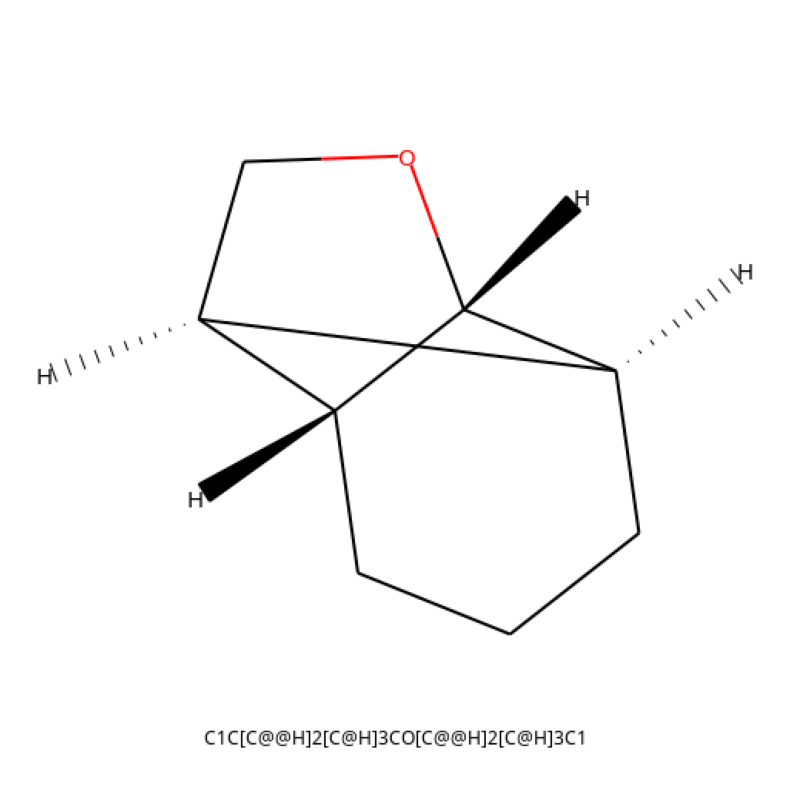

  0%|          | 0/32 [00:00<?, ?it/s]

RDKit ERROR: [15:49:53] Explicit valence for atom # 1 C, 5, is greater than permitted
[15:49:53] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [15:49:53] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [15:49:53] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [15:49:53] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [15:49:53] Explicit valence for atom # 1 C, 5, is greater than permitted
[15:49:53] Explicit valence for atom # 1 C, 5, is greater than permitted
[15:49:53] Explicit valence for atom # 1 C, 5, is greater than permitted
[15:49:53] Explicit valence for atom # 1 C, 5, is greater than permitted
[15:49:53] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [15:49:53] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [15:49:53] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [15:49:53] Explicit 

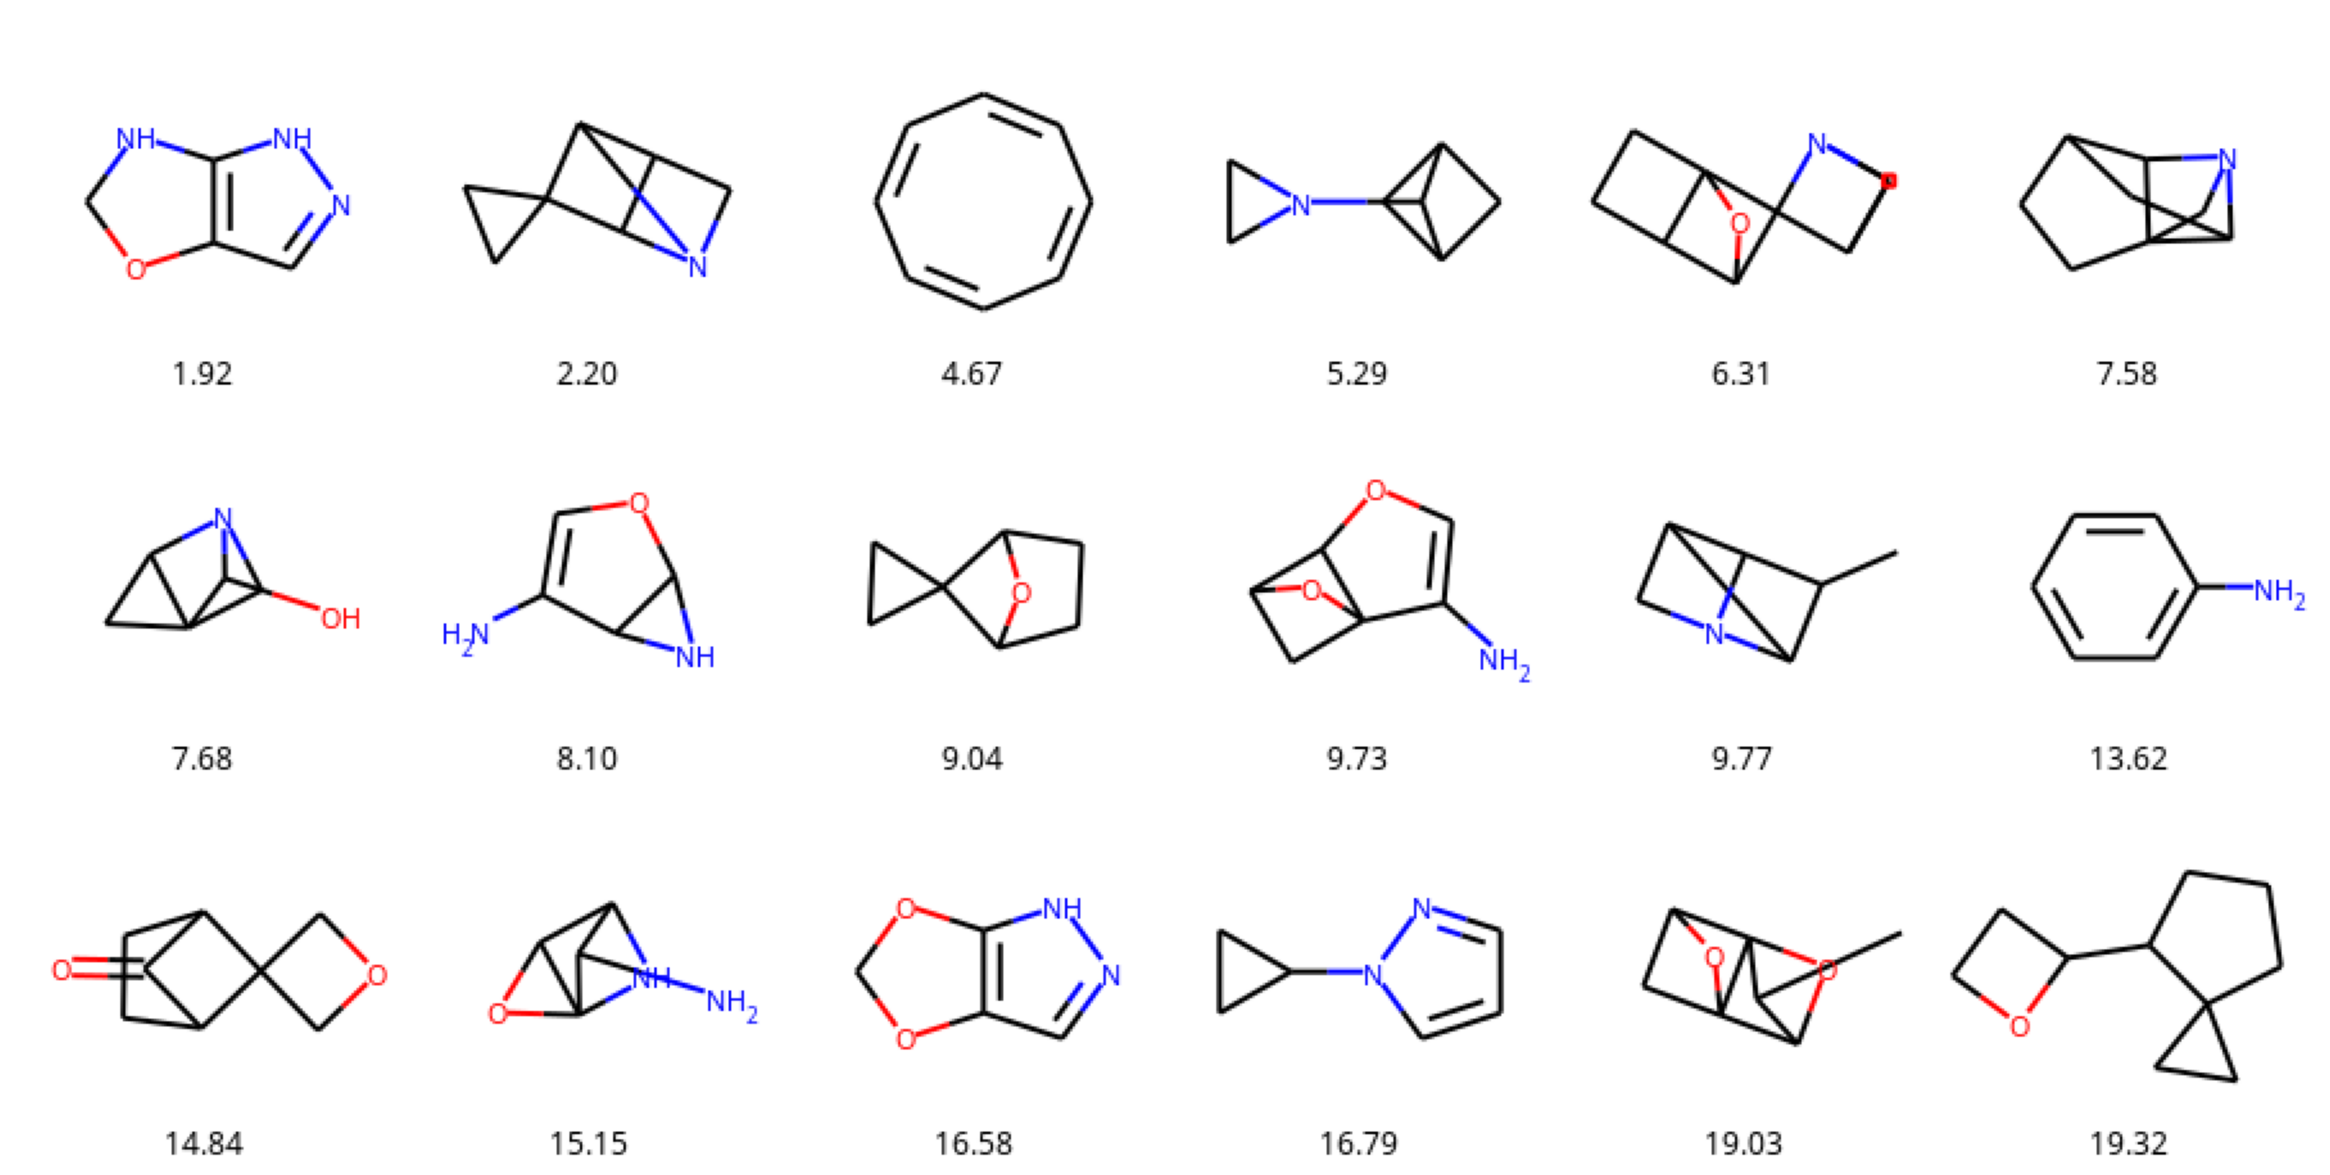

In [46]:
file_path = './data/qm9_smiles.txt'
smiles_list = read_smiles(file_path)
plot_latent_neighbors(model, smiles_list, mol_index=834)

## Decoding Distribution (Figure 4)

In [113]:
import torch
import pandas as pd
from tqdm import tqdm
from rdkit import Chem
from collections import Counter

def encode_decode_distribution(model, smiles, num_decodes=512, noise_scale=0.1):
    # Encode the input molecule
    z = model.encode_from_smiles([smiles])
    
    # Split the latent vector into tree and mol parts
    z_tree = z[:, :model.latent_size]
    z_mol = z[:, model.latent_size:]
    
    # Get InChI key for input molecule
    input_mol = Chem.MolFromSmiles(smiles)
    input_inchi_key = Chem.MolToInchiKey(input_mol) if input_mol is not None else None
    
    # Decode multiple times with small perturbations
    decoded_smiles = []
    decoded_inchi_keys = []
    for _ in tqdm(range(num_decodes)):
        with torch.no_grad():
            try:
                # Use deterministic decoding
                decoded = model.decode(z_tree, z_mol, prob_decode=True)
                if decoded is not None:
                    mol = Chem.MolFromSmiles(decoded)
                    if mol is not None:
                        canonical_smiles = Chem.MolToSmiles(mol, isomericSmiles=True)
                        inchi_key = Chem.MolToInchiKey(mol)
                        decoded_smiles.append(canonical_smiles)
                        decoded_inchi_keys.append(inchi_key)
            except Exception as e:
                print(f"Error during decoding: {e}")
                continue
    
    # Count frequencies of decoded SMILES
    smiles_counter = Counter(decoded_smiles)
    
    # Calculate total successful decodings
    total_decodings = sum(smiles_counter.values())
    
    # Create DataFrame
    df = pd.DataFrame(list(smiles_counter.items()), columns=['SMILES', 'Count'])
    
    # Add Percentage column
    df['Percentage'] = df['Count'] / total_decodings * 100
    
    # Add InChI key comparison ("Same" column)
    df["Same"] = df['SMILES'].apply(lambda x: Chem.MolToInchiKey(Chem.MolFromSmiles(x)) == input_inchi_key)
    
    # Sort by Count (descending) and reset index
    df = df.sort_values('Count', ascending=False).reset_index(drop=True)
    
    return df


In [123]:
input_smiles = smiles_list[3354]
result_df = encode_decode_distribution(model, input_smiles, num_decodes=1000)
print(result_df)

/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/ece/miniconda3/envs/jast-jtvae/lib/python3.7/site-packages/torch/nn/functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
  0%|          | 0/1000 [00:00<?, ?it/s]

RDKit ERROR: [16:49:40] Explicit valence for atom # 2 N, 5, is greater than permitted
RDKit ERROR: [16:49:40] Explicit valence for atom # 2 N, 5, is greater than permitted
RDKit ERROR: [16:49:40] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [16:49:40] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [16:49:40] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [16:49:40] Explicit valence for atom # 1 C, 5, is greater than permitted
[16:49:40] Explicit valence for atom # 2 N, 5, is greater than permitted
[16:49:40] Explicit valence for atom # 2 N, 5, is greater than permitted
[16:49:40] Explicit valence for atom # 1 C, 5, is greater than permitted
[16:49:40] Explicit valence for atom # 2 N, 4, is greater than permitted
[16:49:40] Explicit valence for atom # 2 N, 4, is greater than permitted
[16:49:40] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [16:49:40] Explicit valence for a

            SMILES  Count  Percentage   Same
0    c1noc2c1NCCN2    624        62.4   True
1   C1=CNc2oncc2N1    297        29.7  False
2   C1=CNc2oncc2C1     42         4.2  False
3    c1noc2c1CCCN2     17         1.7  False
4     c1noc2c1NCN2      8         0.8  False
5  c1noc2c1C1CC1N2      4         0.4  False
6    c1noc2c1CNCN2      4         0.4  False
7   C1=CNc2cnoc2C1      2         0.2  False
8    c1noc2c1OCCN2      1         0.1  False
9    c1noc2c1NCCC2      1         0.1  False


In [124]:
result_df

SMILES  Count  Percentage   Same
0    c1noc2c1NCCN2    624        62.4   True
1   C1=CNc2oncc2N1    297        29.7  False
2   C1=CNc2oncc2C1     42         4.2  False
3    c1noc2c1CCCN2     17         1.7  False
4     c1noc2c1NCN2      8         0.8  False
5  c1noc2c1C1CC1N2      4         0.4  False
6    c1noc2c1CNCN2      4         0.4  False
7   C1=CNc2cnoc2C1      2         0.2  False
8    c1noc2c1OCCN2      1         0.1  False
9    c1noc2c1NCCC2      1         0.1  False

In [125]:
print(input_smiles)

c1noc2c1NCCN2


### Dataset Plots

In [3]:
property_to_target_value_map = {
    "homo": [-0.3, -0.27, -0.25, -0.23, -0.2],
    "lumo": [-0.15, -0.1, -0.05, 0.0, 0.05, 0.1],
    "r2": [500, 1000, 1500, 2000, 2500]
}

'''property_to_target_value_map = {
    "homo": [-0.4, -0.3, -0.2],
    "lumo": [-0.15, 0.05, 0.05],
    "r2": [500, 1500, 2500]
}'''

entire_data = pd.read_csv('./data/qm9_smiles_prop_normalized.csv')

# Calculate real average values
m3 = entire_data['r2'].mean()
m2 = entire_data['lumo'].mean()
m1 = entire_data['homo'].mean()

# Calculate real standard deviations
s3 = entire_data['r2'].std()
s2 = entire_data['lumo'].std()
s1 = entire_data['homo'].std()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_property_histograms(df):
    # Extract columns
    homo = df['homo']
    lumo = df['lumo']
    r2 = df['r2']

    # Create figure and axes
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # Histogram for HOMO
    axes[0, 0].hist(homo, bins=300, color='blue', alpha=0.7)
    axes[0, 0].set_title('Histogram of HOMO')
    axes[0, 0].set_xlabel('HOMO')
    axes[0, 0].set_ylabel('Frequency')
    
    # Histogram for LUMO
    axes[0, 1].hist(lumo, bins=300, color='green', alpha=0.7)
    axes[0, 1].set_title('Histogram of LUMO')
    axes[0, 1].set_xlabel('LUMO')
    axes[0, 1].set_ylabel('Frequency')
    
    # Histogram for R2
    axes[0, 2].hist(r2, bins=300, color='red', alpha=0.7)
    axes[0, 2].set_title('Histogram of R2')
    axes[0, 2].set_xlabel('R2')
    axes[0, 2].set_ylabel('Frequency')
    
    # 2D histogram (HOMO, LUMO)
    axes[1, 0].hist2d(homo, lumo, bins=100, cmap='Blues')
    axes[1, 0].set_title('2D Histogram of HOMO vs LUMO')
    axes[1, 0].set_xlabel('HOMO')
    axes[1, 0].set_ylabel('LUMO')
    
    # 2D histogram (HOMO, R2)
    axes[1, 1].hist2d(homo, r2, bins=100, cmap='Reds')
    axes[1, 1].set_title('2D Histogram of HOMO vs R2')
    axes[1, 1].set_xlabel('HOMO')
    axes[1, 1].set_ylabel('R2')
    
    # 2D histogram (R2, LUMO)
    axes[1, 2].hist2d(r2, lumo, bins=100, cmap='Greens')
    axes[1, 2].set_title('2D Histogram of R2 vs LUMO')
    axes[1, 2].set_xlabel('R2')
    axes[1, 2].set_ylabel('LUMO')
    
    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

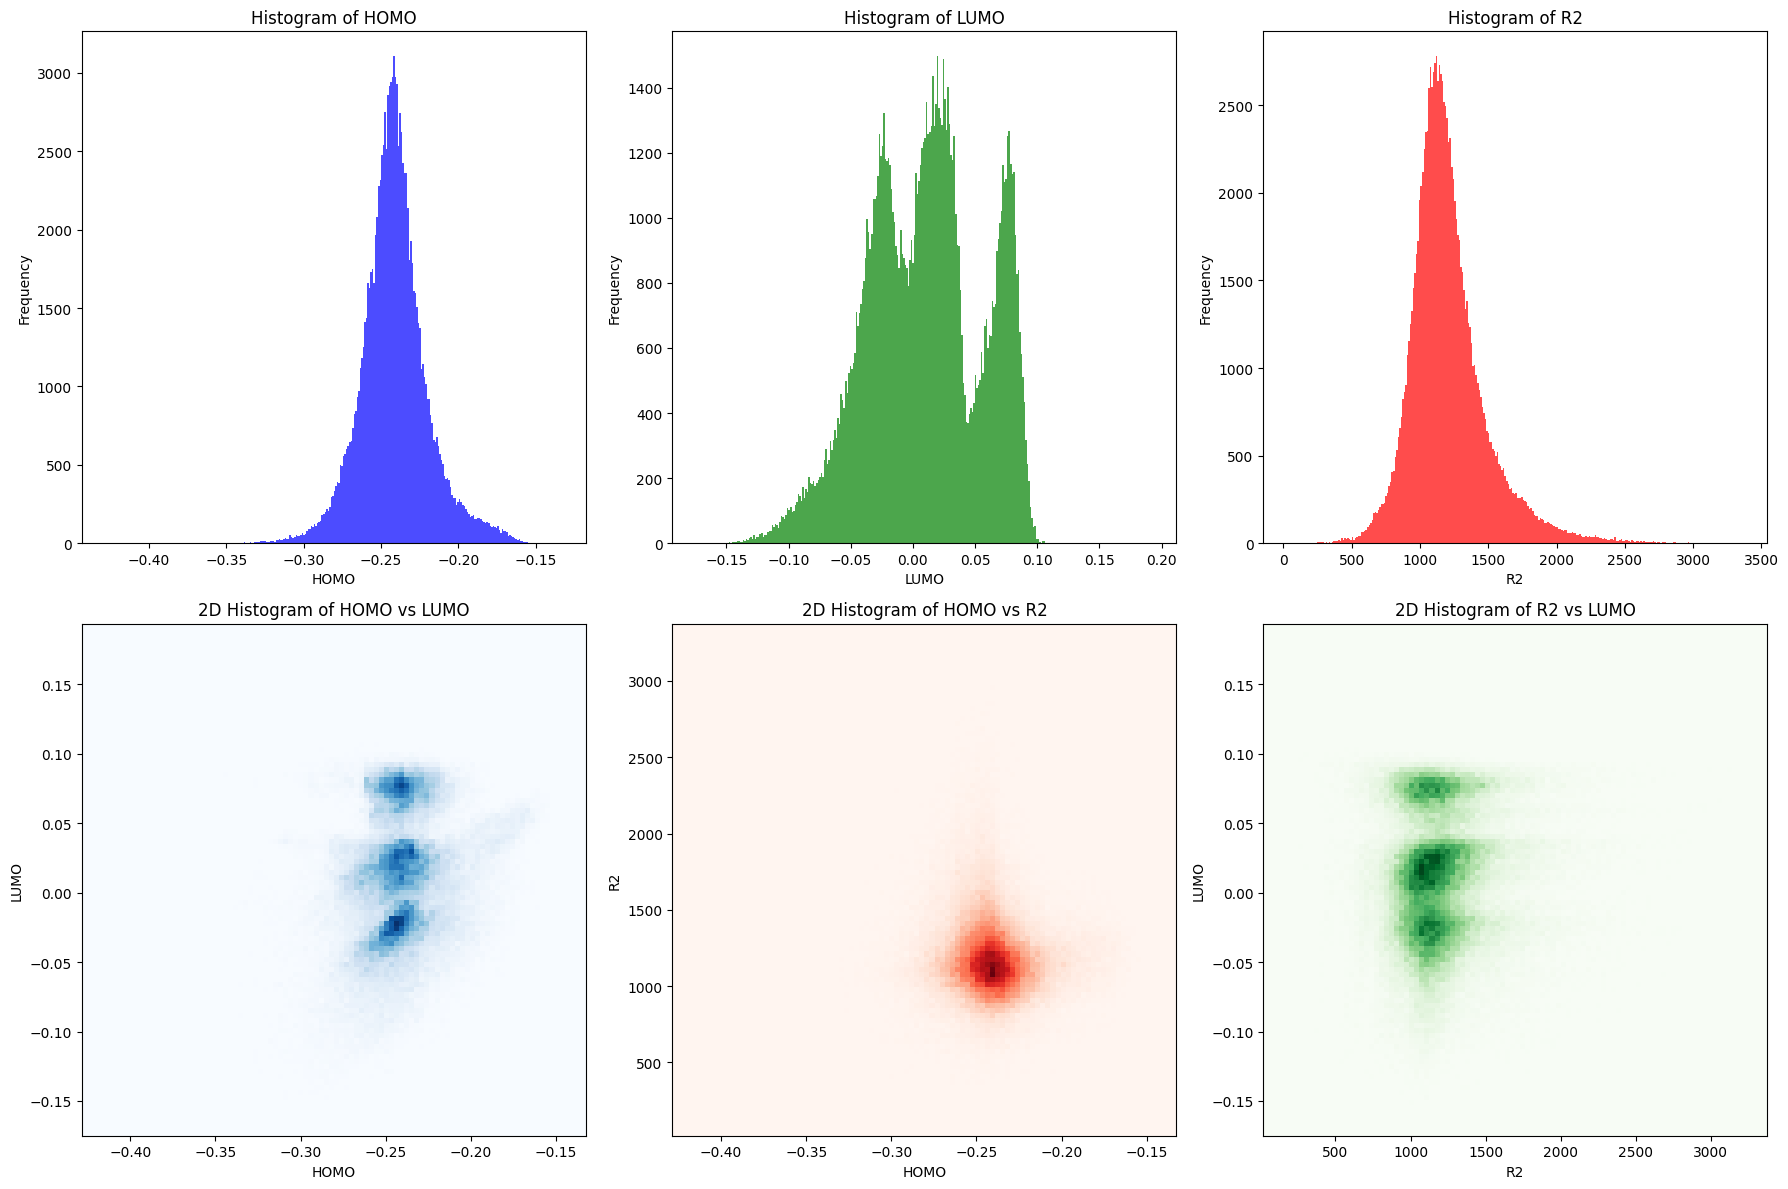

In [5]:
plot_property_histograms(entire_data)